In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.metrics import classification_report, roc_curve, mean_squared_error, mean_absolute_error

In [30]:
df = pd.read_csv('data.csv')
df.head()

year  month duoarea area-name product product-name process  \
0  2014      1     SFL   FLORIDA    EPG0  Natural Gas     VCS   
1  2014      1     SNH    USA-NH    EPG0  Natural Gas     VCS   
2  2014      1     SOR    USA-OR    EPG0  Natural Gas     VCS   
3  2014      1     SDE    USA-DE    EPG0  Natural Gas     VCS   
4  2014      1     SAZ    USA-AZ    EPG0  Natural Gas     VCS   

             process-name    series  \
0  Commercial Consumption  N3020FL2   
1  Commercial Consumption  N3020NH2   
2  Commercial Consumption  N3020OR2   
3  Commercial Consumption  N3020DE2   
4  Commercial Consumption  N3020AZ2   

                                  series-description   value units  
0  Natural Gas Deliveries to Commercial Consumers...  6605.0  MMCF  
1  Natural Gas Deliveries to Commercial Consumers...  1691.0  MMCF  
2  Natural Gas Deliveries to Commercial Consumers...  4711.0  MMCF  
3  Natural Gas Deliveries to Commercial Consumers...  2128.0  MMCF  
4  Natural Gas Deliveries to Commercial Consumers...  3915.0  MMCF

In [31]:
# Selecting numerical columns for summary statistics
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Calculating summary statistics for numerical columns
summary_statistics = df[numerical_cols].describe()

# Displaying summary statistics
print("Summary Statistics for Natural Gas Consumption:")
print(summary_statistics)


Summary Statistics for Natural Gas Consumption:
               year         month         value
count  37994.000000  37994.000000  3.751800e+04
mean    2018.545455      6.454545  2.970826e+04
std        2.903442      3.473677  1.504204e+05
min     2014.000000      1.000000  0.000000e+00
25%     2016.000000      3.000000  8.092500e+02
50%     2019.000000      6.000000  4.380000e+03
75%     2021.000000      9.000000  1.616350e+04
max     2024.000000     12.000000  3.391775e+06


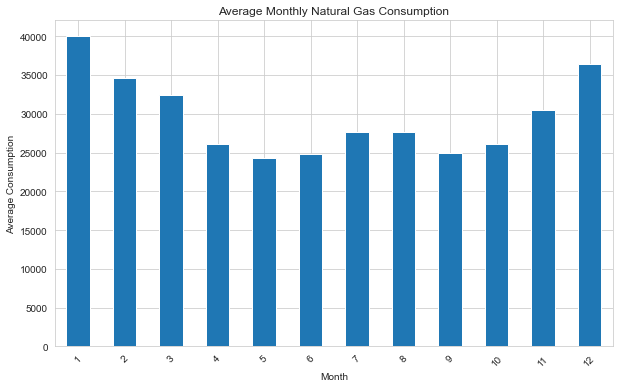

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Analyze trends over time by aggregating data on a monthly basis across all years
monthly_consumption = df.groupby('month')['value'].mean()
plt.figure(figsize=(10, 6))
monthly_consumption.plot(kind='bar')
plt.title('Average Monthly Natural Gas Consumption')
plt.xlabel('Month')
plt.ylabel('Average Consumption')
plt.xticks(rotation=45)
plt.show()

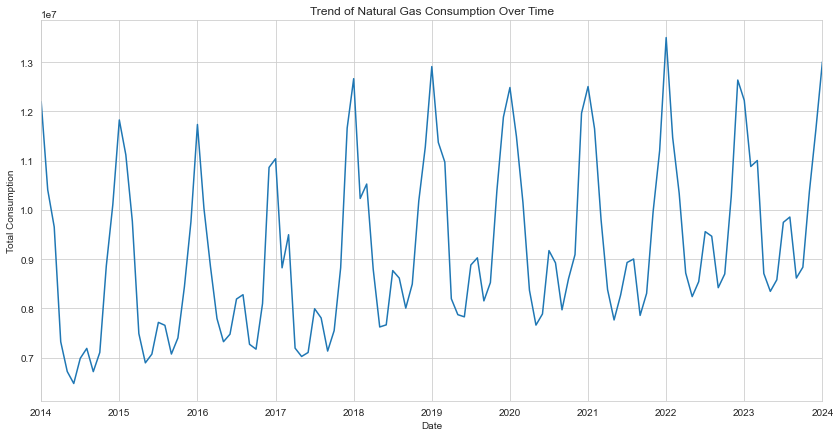

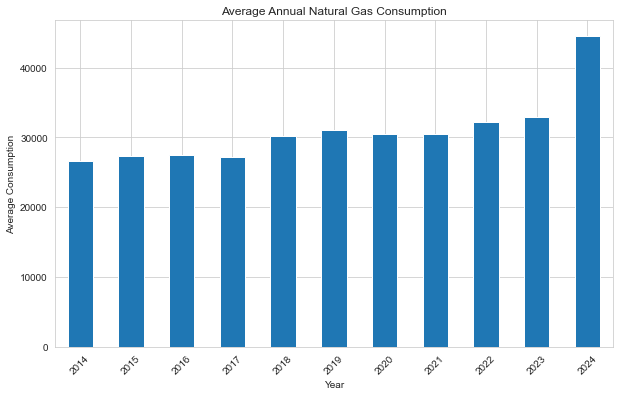

In [33]:
# Convert 'year' and 'month' to a datetime format for easier time series analysis
df['date'] = pd.to_datetime(df[['year', 'month']].assign(DAY=1))

# Set 'date' as the index
df.set_index('date', inplace=True)

# Group by date and sum up the total consumption for each month
monthly_consumption = df.groupby(pd.Grouper(freq='M'))['value'].sum()

# Plotting the trend of natural gas consumption over time
plt.figure(figsize=(14, 7))
monthly_consumption.plot(title='Trend of Natural Gas Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Total Consumption')
plt.show()


# Calculate the average consumption for each year
yearly_consumption = df.groupby('year')['value'].mean()

# Plotting the trend of average natural gas consumption per year
plt.figure(figsize=(10, 6))
yearly_consumption.plot(kind='bar')
plt.title('Average Annual Natural Gas Consumption')
plt.xlabel('Year')
plt.ylabel('Average Consumption')
plt.xticks(rotation=45)
plt.show()

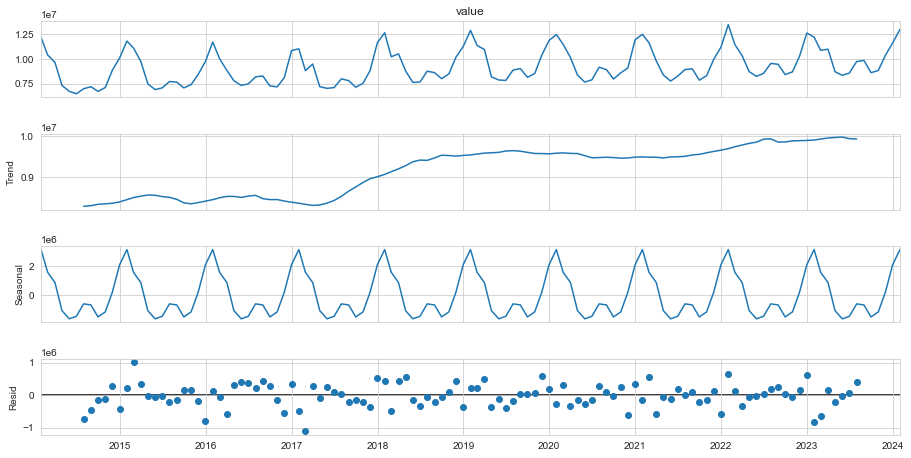

In [34]:
# Seasonal Decomposition to analyze trends, seasonality, and residuals
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(monthly_consumption, model='additive')

# Plotting the decomposed components of the time series
fig = decomposition.plot()
fig.set_size_inches(14, 7)
plt.show()

Area with the highest natural gas consumption: TEXAS - 571970195.0
Area with the lowest natural gas consumption: USA-HI - 59968.0
Process with the highest natural gas consumption: Delivered to Consumers - 543148364.0
Process with the lowest natural gas consumption: Vehicle Fuel Consumption - 989544.0


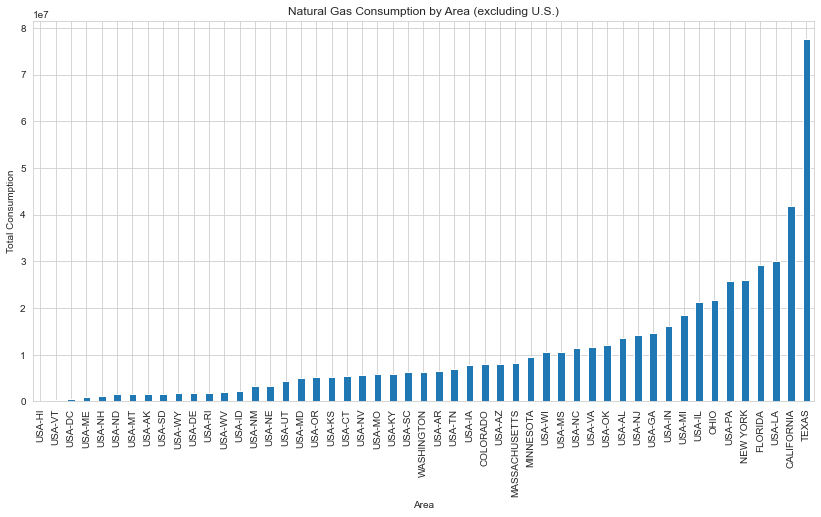

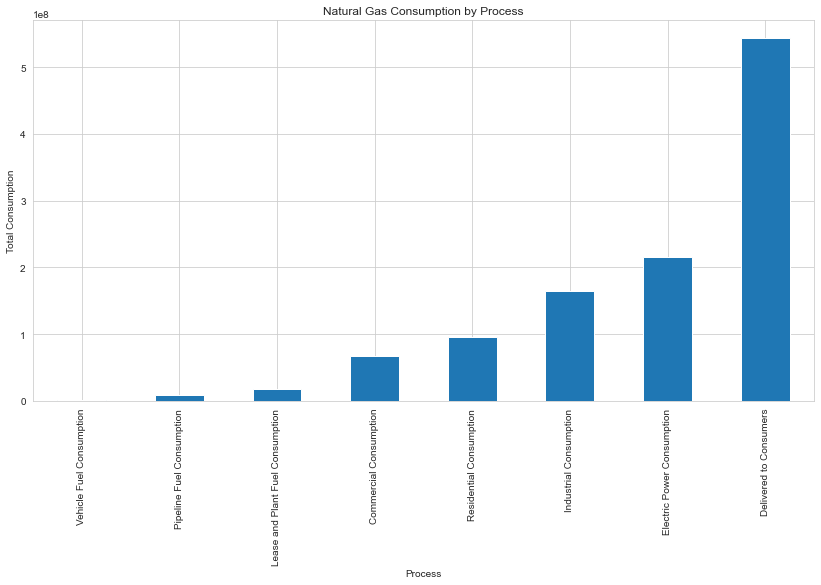

In [35]:
# Grouping data by area and calculating total consumption for each area
area_consumption = df.groupby('area-name')['value'].sum().sort_values()

# Identifying the area with the highest and lowest consumption

# Find the area with the highest consumption (excluding U.S.)
highest_area_consumption = area_consumption.drop('U.S.').idxmax()
lowest_area_consumption = area_consumption.idxmin()

# Find the area with the highest consumption (excluding U.S.)
highest_consumption = area_consumption.drop('U.S.').idxmax()

print(f"Area with the highest natural gas consumption: {highest_area_consumption} - {area_consumption.max()}")
print(f"Area with the lowest natural gas consumption: {lowest_area_consumption} - {area_consumption.min()}")

# Grouping data by process and calculating total consumption for each process
process_consumption = df.groupby('process-name')['value'].sum().sort_values()

# Identifying the process with the highest and lowest consumption
highest_process_consumption = process_consumption.idxmax()
lowest_process_consumption = process_consumption.idxmin()

print(f"Process with the highest natural gas consumption: {highest_process_consumption} - {process_consumption.max()}")
print(f"Process with the lowest natural gas consumption: {lowest_process_consumption} - {process_consumption.min()}")


# Visualizing area consumption (excluding U.S.)
plt.figure(figsize=(14, 7))
area_consumption.drop('U.S.').plot(kind='bar')  # Exclude 'U.S.' using .drop()
plt.title('Natural Gas Consumption by Area (excluding U.S.)')
plt.xlabel('Area')
plt.ylabel('Total Consumption')
plt.show()


# Visualizing process consumption
plt.figure(figsize=(14, 7))
process_consumption.plot(kind='bar')
plt.title('Natural Gas Consumption by Process')
plt.xlabel('Process')
plt.ylabel('Total Consumption')
plt.show()

In [36]:
print("Summary Statistics for Natural Gas Consumption:")
print(summary_statistics)
print("\nArea with the highest natural gas consumption: {} - {}".format(highest_area_consumption, area_consumption.max()))
print("Area with the lowest natural gas consumption: {} - {}".format(lowest_area_consumption, area_consumption.min()))
print("Process with the highest natural gas consumption: {} - {}".format(highest_process_consumption, process_consumption.max()))
print("Process with the lowest natural gas consumption: {} - {}".format(lowest_process_consumption, process_consumption.min()))

Summary Statistics for Natural Gas Consumption:
               year         month         value
count  37994.000000  37994.000000  3.751800e+04
mean    2018.545455      6.454545  2.970826e+04
std        2.903442      3.473677  1.504204e+05
min     2014.000000      1.000000  0.000000e+00
25%     2016.000000      3.000000  8.092500e+02
50%     2019.000000      6.000000  4.380000e+03
75%     2021.000000      9.000000  1.616350e+04
max     2024.000000     12.000000  3.391775e+06

Area with the highest natural gas consumption: TEXAS - 571970195.0
Area with the lowest natural gas consumption: USA-HI - 59968.0
Process with the highest natural gas consumption: Delivered to Consumers - 543148364.0
Process with the lowest natural gas consumption: Vehicle Fuel Consumption - 989544.0


In [37]:
# Handling missing values in the dataset
# First, check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values per column before imputation:")
print(missing_values)

# For numerical columns, impute missing values with the median of the column
for col in numerical_cols:
    if df[col].isnull().any():
        df[col].fillna(df[col].median(), inplace=True)

# For categorical columns, impute missing values with the mode (most frequent value) of the column
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().any():
        df[col].fillna(df[col].mode()[0], inplace=True)

# Check for missing values again to ensure all have been handled
missing_values_after = df.isnull().sum()
print("\nMissing values per column after imputation:")
print(missing_values_after)

Missing values per column before imputation:
year                    0
month                   0
duoarea                 0
area-name               0
product                 0
product-name            0
process                 0
process-name            0
series                  0
series-description      0
value                 476
units                   0
dtype: int64

Missing values per column after imputation:
year                  0
month                 0
duoarea               0
area-name             0
product               0
product-name          0
process               0
process-name          0
series                0
series-description    0
value                 0
units                 0
dtype: int64


In [38]:
from sklearn.preprocessing import LabelEncoder

# Copy the DataFrame for preprocessing
df_preprocessed = df.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_cols = ['duoarea', 'area-name', 'product', 'product-name', 'process', 'process-name', 'series', 'series-description', 'units']

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    df_preprocessed[col] = label_encoder.fit_transform(df_preprocessed[col])

# Display the first few rows of the preprocessed DataFrame to verify changes
print(df_preprocessed.head())

            year  month  duoarea  area-name  product  product-name  process  \
date                                                                          
2014-01-01  2014      1       10          2        0             0        0   
2014-01-01  2014      1       31         34        0             0        0   
2014-01-01  2014      1       38         39        0             0        0   
2014-01-01  2014      1        9         15        0             0        0   
2014-01-01  2014      1        4         12        0             0        0   

            process-name  series  series-description   value  units  
date                                                                 
2014-01-01             0      61                 167  6605.0      0  
2014-01-01             0      82                 187  1691.0      0  
2014-01-01             0      89                 195  4711.0      0  
2014-01-01             0      60                 166  2128.0      0  
2014-01-01             0  

# XGBRegressor

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import numpy as np

# Preparing the dataset for time series forecasting
# Selecting relevant features for the model
features = ['year', 'month', 'duoarea', 'area-name', 'product', 'product-name', 'process', 'process-name', 'series', 'series-description', 'units']
target = 'value'

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_preprocessed[features], df_preprocessed[target], test_size=0.2, random_state=42)

# Initializing and training the XGBoost regressor model
model1 = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model1.fit(X_train, y_train)

# Making predictions on the test set
predictions = model1.predict(X_test)

# Evaluating the model performance
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")

y_pred = model1.predict(X_test)
from sklearn.metrics import r2_score

acc = r2_score(y_test, y_pred)
print(f"R2 score on Test Set: {acc}")
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Root Mean Squared Error (RMSE) on Test Set: 13539.3857374397
R2 score on Test Set: 0.9908143417158436
Mean Squared Error (MSE): 183314966.14718553
Mean Absolute Error (MAE): 5888.3071897826485


In [13]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, predictions)

print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape}")

Mean Absolute Percentage Error (MAPE) on Test Set: 2.3804722121607875e+17


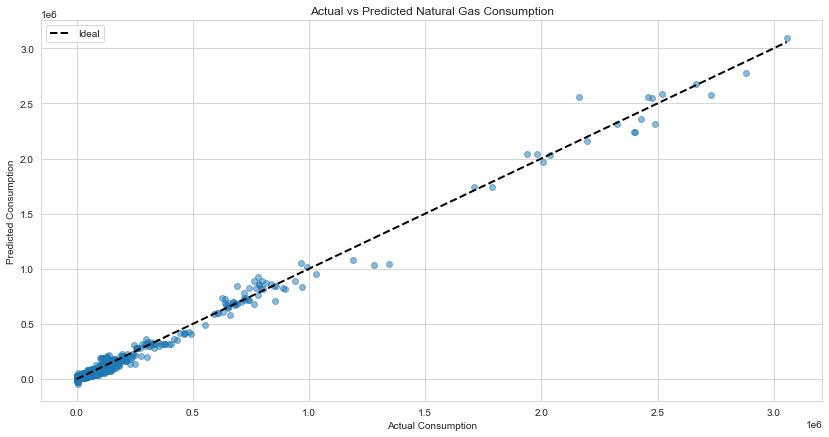

In [14]:
# Visualization of model performance: Actual vs Predicted Consumption
plt.figure(figsize=(14, 7))
plt.scatter(y_test, predictions, alpha=0.5)
plt.title('Actual vs Predicted Natural Gas Consumption')
plt.xlabel('Actual Consumption')
plt.ylabel('Predicted Consumption')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal')
plt.legend()
plt.show()

# RandomForest

In [15]:
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor(n_estimators = 50, max_depth = 15, random_state = 55, n_jobs=-1).fit(X_train, y_train)

In [16]:
# Making predictions on the test set
predictions = model2.predict(X_test)

# Evaluating the model performance
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")


acc = r2_score(y_test, predictions)
print(f"R2 score on Test Set: {acc}")
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, predictions)

print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape}")

Root Mean Squared Error (RMSE) on Test Set: 8899.672525362836
R2 score on Test Set: 0.9960311890222814
Mean Squared Error (MSE): 79204171.0586981
Mean Absolute Error (MAE): 2445.4979036834334
Mean Absolute Percentage Error (MAPE) on Test Set: 1.040978015073943e+16


# KNN

In [17]:
from sklearn.neighbors import KNeighborsRegressor

model3 = KNeighborsRegressor(n_neighbors=6).fit(X_train, y_train)

In [18]:
# Making predictions on the test set
predictions = model3.predict(X_test)

# Evaluating the model performance
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")


acc = r2_score(y_test, predictions)
print(f"R2 score on Test Set: {acc}")
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, predictions)

print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape}")

Root Mean Squared Error (RMSE) on Test Set: 10891.242873430188
R2 score on Test Set: 0.9940561581158934
Mean Squared Error (MSE): 118619171.32804385
Mean Absolute Error (MAE): 2484.904175988069
Mean Absolute Percentage Error (MAPE) on Test Set: 5014766185944922.0


# lightgbm

In [19]:
import lightgbm as lgb
model4 = lgb.LGBMRegressor(random_state=42)  
model4.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002835 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 629
[LightGBM] [Info] Number of data points in the train set: 30395, number of used features: 8
[LightGBM] [Info] Start training from score 29753.997434


LGBMRegressor(random_state=42)

In [20]:
# Making predictions on the test set
predictions = model4.predict(X_test)

# Evaluating the model performance
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")


acc = r2_score(y_test, predictions)
print(f"R2 score on Test Set: {acc}")
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, predictions)

print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape}")

Root Mean Squared Error (RMSE) on Test Set: 12311.56806816737
R2 score on Test Set: 0.9924048019417022
Mean Squared Error (MSE): 151574708.2971184
Mean Absolute Error (MAE): 4622.767434206344
Mean Absolute Percentage Error (MAPE) on Test Set: 2.794116329962462e+17


# AdaBoostRegressor

In [21]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Create an instance of AdaBoostRegressor
base_model = DecisionTreeRegressor(max_depth=11)
model5 = AdaBoostRegressor(base_estimator=base_model, n_estimators=100)

model5.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=11),
                  n_estimators=100)

In [22]:
# Making predictions on the test set
predictions = model5.predict(X_test)

# Evaluating the model performance
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")


acc = r2_score(y_test, predictions)
print(f"R2 score on Test Set: {acc}")
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, predictions)

print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape}")

Root Mean Squared Error (RMSE) on Test Set: 10351.056521198268
R2 score on Test Set: 0.9946311444137543
Mean Squared Error (MSE): 107144371.10504119
Mean Absolute Error (MAE): 3534.153395750219
Mean Absolute Percentage Error (MAPE) on Test Set: 3.792961733702856e+16


# CatBoostRegressor

In [15]:
from catboost import CatBoostRegressor
model6 = CatBoostRegressor(iterations=10000, learning_rate=0.1, depth=10)

In [16]:
model6.fit(X_train, y_train)

0:	learn: 138141.3582257	total: 202ms	remaining: 33m 42s
1:	learn: 126139.8492221	total: 229ms	remaining: 19m 5s
2:	learn: 115974.6741593	total: 259ms	remaining: 14m 21s
3:	learn: 106218.1425237	total: 286ms	remaining: 11m 55s
4:	learn: 97384.6847447	total: 303ms	remaining: 10m 5s
5:	learn: 89416.4895467	total: 312ms	remaining: 8m 39s
6:	learn: 82033.2046531	total: 338ms	remaining: 8m 3s
7:	learn: 75282.4408413	total: 366ms	remaining: 7m 37s
8:	learn: 70033.0663341	total: 394ms	remaining: 7m 16s
9:	learn: 64784.6247125	total: 426ms	remaining: 7m 6s
10:	learn: 59841.4843839	total: 464ms	remaining: 7m
11:	learn: 55701.1598147	total: 475ms	remaining: 6m 35s
12:	learn: 51849.2343691	total: 504ms	remaining: 6m 27s
13:	learn: 48363.7041173	total: 532ms	remaining: 6m 19s
14:	learn: 45350.1256669	total: 561ms	remaining: 6m 13s
15:	learn: 42452.1045744	total: 589ms	remaining: 6m 7s
16:	learn: 39935.3788971	total: 618ms	remaining: 6m 2s
17:	learn: 37623.5606595	total: 648ms	remaining: 5m 59s
18:

152:	learn: 8341.7156642	total: 7.09s	remaining: 7m 36s
153:	learn: 8321.4507738	total: 7.15s	remaining: 7m 37s
154:	learn: 8311.3959714	total: 7.2s	remaining: 7m 37s
155:	learn: 8268.8648269	total: 7.25s	remaining: 7m 37s
156:	learn: 8229.9744026	total: 7.29s	remaining: 7m 36s
157:	learn: 8192.5576032	total: 7.32s	remaining: 7m 35s
158:	learn: 8163.9523796	total: 7.35s	remaining: 7m 35s
159:	learn: 8136.9161384	total: 7.38s	remaining: 7m 33s
160:	learn: 8103.5091787	total: 7.41s	remaining: 7m 32s
161:	learn: 8079.3044207	total: 7.44s	remaining: 7m 31s
162:	learn: 8055.1892280	total: 7.47s	remaining: 7m 30s
163:	learn: 8001.4681876	total: 7.5s	remaining: 7m 29s
164:	learn: 7971.6501390	total: 7.53s	remaining: 7m 28s
165:	learn: 7952.1378504	total: 7.56s	remaining: 7m 27s
166:	learn: 7932.0823632	total: 7.59s	remaining: 7m 26s
167:	learn: 7905.6591428	total: 7.62s	remaining: 7m 25s
168:	learn: 7886.0447482	total: 7.65s	remaining: 7m 24s
169:	learn: 7864.4563521	total: 7.68s	remaining: 7

299:	learn: 5769.9286161	total: 14.6s	remaining: 7m 53s
300:	learn: 5762.1207570	total: 14.7s	remaining: 7m 53s
301:	learn: 5756.8721122	total: 14.7s	remaining: 7m 53s
302:	learn: 5748.1025915	total: 14.8s	remaining: 7m 53s
303:	learn: 5723.6416635	total: 14.8s	remaining: 7m 53s
304:	learn: 5711.4774582	total: 14.9s	remaining: 7m 53s
305:	learn: 5700.5442491	total: 14.9s	remaining: 7m 53s
306:	learn: 5692.5484796	total: 15s	remaining: 7m 53s
307:	learn: 5686.0129390	total: 15s	remaining: 7m 53s
308:	learn: 5672.6288179	total: 15.1s	remaining: 7m 53s
309:	learn: 5667.5019366	total: 15.1s	remaining: 7m 53s
310:	learn: 5655.9534617	total: 15.2s	remaining: 7m 52s
311:	learn: 5648.3735598	total: 15.2s	remaining: 7m 52s
312:	learn: 5636.2520483	total: 15.3s	remaining: 7m 52s
313:	learn: 5631.6866618	total: 15.3s	remaining: 7m 52s
314:	learn: 5624.1847187	total: 15.4s	remaining: 7m 52s
315:	learn: 5612.2693927	total: 15.4s	remaining: 7m 52s
316:	learn: 5601.4359449	total: 15.5s	remaining: 7m 

450:	learn: 4580.3047547	total: 22.1s	remaining: 7m 48s
451:	learn: 4574.3205113	total: 22.2s	remaining: 7m 48s
452:	learn: 4563.4822186	total: 22.2s	remaining: 7m 48s
453:	learn: 4559.6182630	total: 22.3s	remaining: 7m 48s
454:	learn: 4551.7808602	total: 22.3s	remaining: 7m 48s
455:	learn: 4547.2207088	total: 22.4s	remaining: 7m 48s
456:	learn: 4540.9929610	total: 22.4s	remaining: 7m 48s
457:	learn: 4537.5156416	total: 22.5s	remaining: 7m 47s
458:	learn: 4533.4517311	total: 22.5s	remaining: 7m 47s
459:	learn: 4520.8295108	total: 22.5s	remaining: 7m 47s
460:	learn: 4517.4487778	total: 22.6s	remaining: 7m 46s
461:	learn: 4512.3786746	total: 22.6s	remaining: 7m 46s
462:	learn: 4507.3889370	total: 22.6s	remaining: 7m 45s
463:	learn: 4503.1687617	total: 22.7s	remaining: 7m 45s
464:	learn: 4496.8908067	total: 22.7s	remaining: 7m 45s
465:	learn: 4493.7989183	total: 22.7s	remaining: 7m 45s
466:	learn: 4490.3231576	total: 22.8s	remaining: 7m 45s
467:	learn: 4482.6065142	total: 22.9s	remaining:

597:	learn: 3910.3943878	total: 30s	remaining: 7m 51s
598:	learn: 3905.2026232	total: 30s	remaining: 7m 51s
599:	learn: 3895.8175529	total: 30.1s	remaining: 7m 51s
600:	learn: 3893.9450720	total: 30.1s	remaining: 7m 51s
601:	learn: 3890.6642519	total: 30.2s	remaining: 7m 51s
602:	learn: 3887.8662033	total: 30.2s	remaining: 7m 51s
603:	learn: 3880.2270787	total: 30.3s	remaining: 7m 51s
604:	learn: 3867.8990052	total: 30.3s	remaining: 7m 51s
605:	learn: 3857.5885663	total: 30.4s	remaining: 7m 51s
606:	learn: 3855.1931700	total: 30.5s	remaining: 7m 51s
607:	learn: 3854.9580804	total: 30.5s	remaining: 7m 50s
608:	learn: 3852.0525923	total: 30.5s	remaining: 7m 50s
609:	learn: 3848.8494686	total: 30.6s	remaining: 7m 50s
610:	learn: 3845.3796666	total: 30.6s	remaining: 7m 50s
611:	learn: 3844.1203546	total: 30.7s	remaining: 7m 50s
612:	learn: 3841.7524859	total: 30.8s	remaining: 7m 51s
613:	learn: 3834.0109534	total: 30.9s	remaining: 7m 51s
614:	learn: 3827.2271752	total: 30.9s	remaining: 7m 

744:	learn: 3414.1195287	total: 37.9s	remaining: 7m 50s
745:	learn: 3412.1645922	total: 37.9s	remaining: 7m 50s
746:	learn: 3407.2696431	total: 38s	remaining: 7m 50s
747:	learn: 3404.5685093	total: 38s	remaining: 7m 50s
748:	learn: 3403.6925605	total: 38.1s	remaining: 7m 50s
749:	learn: 3399.3928642	total: 38.1s	remaining: 7m 50s
750:	learn: 3394.7453169	total: 38.2s	remaining: 7m 50s
751:	learn: 3393.6695902	total: 38.2s	remaining: 7m 50s
752:	learn: 3390.6161952	total: 38.3s	remaining: 7m 49s
753:	learn: 3388.4292017	total: 38.3s	remaining: 7m 49s
754:	learn: 3387.3128851	total: 38.4s	remaining: 7m 49s
755:	learn: 3385.8374243	total: 38.4s	remaining: 7m 49s
756:	learn: 3385.1954778	total: 38.4s	remaining: 7m 49s
757:	learn: 3382.1010952	total: 38.5s	remaining: 7m 49s
758:	learn: 3380.8284928	total: 38.5s	remaining: 7m 49s
759:	learn: 3375.8281418	total: 38.6s	remaining: 7m 48s
760:	learn: 3374.5297416	total: 38.6s	remaining: 7m 48s
761:	learn: 3374.4710416	total: 38.6s	remaining: 7m 

894:	learn: 3026.4126468	total: 44.8s	remaining: 7m 36s
895:	learn: 3023.5048816	total: 44.9s	remaining: 7m 36s
896:	learn: 3021.6150668	total: 44.9s	remaining: 7m 36s
897:	learn: 3016.3606601	total: 45s	remaining: 7m 35s
898:	learn: 3014.5618333	total: 45s	remaining: 7m 35s
899:	learn: 3010.7110819	total: 45.1s	remaining: 7m 35s
900:	learn: 3009.3476668	total: 45.1s	remaining: 7m 35s
901:	learn: 3004.5196709	total: 45.2s	remaining: 7m 35s
902:	learn: 3002.9870018	total: 45.2s	remaining: 7m 35s
903:	learn: 2998.6597335	total: 45.3s	remaining: 7m 35s
904:	learn: 2998.4760926	total: 45.3s	remaining: 7m 34s
905:	learn: 2993.8297048	total: 45.3s	remaining: 7m 35s
906:	learn: 2992.8359684	total: 45.4s	remaining: 7m 34s
907:	learn: 2988.6101638	total: 45.4s	remaining: 7m 34s
908:	learn: 2986.9831564	total: 45.5s	remaining: 7m 34s
909:	learn: 2984.1173026	total: 45.5s	remaining: 7m 34s
910:	learn: 2982.5340287	total: 45.6s	remaining: 7m 34s
911:	learn: 2980.2928750	total: 45.6s	remaining: 7m 

1041:	learn: 2711.7945117	total: 52.8s	remaining: 7m 33s
1042:	learn: 2710.3932494	total: 52.8s	remaining: 7m 33s
1043:	learn: 2709.6505649	total: 52.9s	remaining: 7m 33s
1044:	learn: 2705.5392731	total: 53s	remaining: 7m 34s
1045:	learn: 2704.7035247	total: 53s	remaining: 7m 34s
1046:	learn: 2702.2178014	total: 53.1s	remaining: 7m 33s
1047:	learn: 2702.1283641	total: 53.1s	remaining: 7m 33s
1048:	learn: 2700.8056260	total: 53.1s	remaining: 7m 33s
1049:	learn: 2700.3593720	total: 53.2s	remaining: 7m 33s
1050:	learn: 2697.9983020	total: 53.2s	remaining: 7m 33s
1051:	learn: 2697.5670239	total: 53.3s	remaining: 7m 33s
1052:	learn: 2695.5314207	total: 53.3s	remaining: 7m 33s
1053:	learn: 2693.9670285	total: 53.4s	remaining: 7m 33s
1054:	learn: 2692.1798879	total: 53.5s	remaining: 7m 33s
1055:	learn: 2691.4211586	total: 53.5s	remaining: 7m 33s
1056:	learn: 2690.7939750	total: 53.6s	remaining: 7m 33s
1057:	learn: 2688.7998334	total: 53.6s	remaining: 7m 33s
1058:	learn: 2683.7440210	total: 53

1189:	learn: 2485.1242390	total: 1m	remaining: 7m 24s
1190:	learn: 2481.7082118	total: 1m	remaining: 7m 24s
1191:	learn: 2480.6170024	total: 1m	remaining: 7m 24s
1192:	learn: 2477.9918799	total: 1m	remaining: 7m 24s
1193:	learn: 2476.4898350	total: 1m	remaining: 7m 24s
1194:	learn: 2475.4696831	total: 1m	remaining: 7m 23s
1195:	learn: 2474.9116858	total: 1m	remaining: 7m 23s
1196:	learn: 2473.9279889	total: 1m	remaining: 7m 23s
1197:	learn: 2471.8469139	total: 1m	remaining: 7m 23s
1198:	learn: 2470.3227824	total: 1m	remaining: 7m 23s
1199:	learn: 2467.4963440	total: 1m	remaining: 7m 23s
1200:	learn: 2467.4792473	total: 1m	remaining: 7m 23s
1201:	learn: 2465.9330398	total: 1m	remaining: 7m 23s
1202:	learn: 2464.0087529	total: 1m	remaining: 7m 23s
1203:	learn: 2460.8220468	total: 1m	remaining: 7m 23s
1204:	learn: 2460.0038290	total: 1m	remaining: 7m 22s
1205:	learn: 2457.6425532	total: 1m	remaining: 7m 22s
1206:	learn: 2456.1556984	total: 1m	remaining: 7m 22s
1207:	learn: 2455.6129653	to

1337:	learn: 2294.8776763	total: 1m 7s	remaining: 7m 18s
1338:	learn: 2294.6027818	total: 1m 7s	remaining: 7m 18s
1339:	learn: 2293.5548041	total: 1m 7s	remaining: 7m 18s
1340:	learn: 2291.8870995	total: 1m 7s	remaining: 7m 18s
1341:	learn: 2290.4925648	total: 1m 7s	remaining: 7m 18s
1342:	learn: 2289.5253294	total: 1m 8s	remaining: 7m 18s
1343:	learn: 2289.0425981	total: 1m 8s	remaining: 7m 18s
1344:	learn: 2287.8586700	total: 1m 8s	remaining: 7m 18s
1345:	learn: 2287.1148993	total: 1m 8s	remaining: 7m 18s
1346:	learn: 2286.1619258	total: 1m 8s	remaining: 7m 18s
1347:	learn: 2286.0847166	total: 1m 8s	remaining: 7m 17s
1348:	learn: 2285.3157025	total: 1m 8s	remaining: 7m 17s
1349:	learn: 2283.6813333	total: 1m 8s	remaining: 7m 17s
1350:	learn: 2283.2780907	total: 1m 8s	remaining: 7m 17s
1351:	learn: 2281.7615614	total: 1m 8s	remaining: 7m 17s
1352:	learn: 2281.3433069	total: 1m 8s	remaining: 7m 17s
1353:	learn: 2279.5984810	total: 1m 8s	remaining: 7m 17s
1354:	learn: 2278.4514151	total

1480:	learn: 2145.9729480	total: 1m 16s	remaining: 7m 18s
1481:	learn: 2143.7562365	total: 1m 16s	remaining: 7m 18s
1482:	learn: 2143.5766605	total: 1m 16s	remaining: 7m 18s
1483:	learn: 2143.0860794	total: 1m 16s	remaining: 7m 18s
1484:	learn: 2142.7322539	total: 1m 16s	remaining: 7m 18s
1485:	learn: 2141.6489578	total: 1m 16s	remaining: 7m 18s
1486:	learn: 2140.8170959	total: 1m 16s	remaining: 7m 18s
1487:	learn: 2140.3530226	total: 1m 16s	remaining: 7m 18s
1488:	learn: 2139.6095414	total: 1m 16s	remaining: 7m 18s
1489:	learn: 2138.9723947	total: 1m 16s	remaining: 7m 18s
1490:	learn: 2138.2784621	total: 1m 16s	remaining: 7m 18s
1491:	learn: 2137.2971897	total: 1m 16s	remaining: 7m 18s
1492:	learn: 2135.9104389	total: 1m 16s	remaining: 7m 18s
1493:	learn: 2135.0903641	total: 1m 16s	remaining: 7m 18s
1494:	learn: 2133.1229458	total: 1m 17s	remaining: 7m 18s
1495:	learn: 2131.3168382	total: 1m 17s	remaining: 7m 18s
1496:	learn: 2130.7350825	total: 1m 17s	remaining: 7m 18s
1497:	learn: 2

1623:	learn: 2002.5954695	total: 1m 23s	remaining: 7m 9s
1624:	learn: 2001.9123369	total: 1m 23s	remaining: 7m 9s
1625:	learn: 2001.5907709	total: 1m 23s	remaining: 7m 9s
1626:	learn: 2001.1449209	total: 1m 23s	remaining: 7m 9s
1627:	learn: 2000.1345423	total: 1m 23s	remaining: 7m 9s
1628:	learn: 1998.4472210	total: 1m 23s	remaining: 7m 9s
1629:	learn: 1997.7477218	total: 1m 23s	remaining: 7m 9s
1630:	learn: 1997.1220936	total: 1m 23s	remaining: 7m 9s
1631:	learn: 1996.5357969	total: 1m 23s	remaining: 7m 9s
1632:	learn: 1995.4785781	total: 1m 23s	remaining: 7m 9s
1633:	learn: 1994.9410573	total: 1m 23s	remaining: 7m 9s
1634:	learn: 1994.7045542	total: 1m 23s	remaining: 7m 9s
1635:	learn: 1994.0410040	total: 1m 23s	remaining: 7m 8s
1636:	learn: 1993.3822915	total: 1m 23s	remaining: 7m 8s
1637:	learn: 1992.5229267	total: 1m 24s	remaining: 7m 8s
1638:	learn: 1991.7663486	total: 1m 24s	remaining: 7m 8s
1639:	learn: 1991.6802851	total: 1m 24s	remaining: 7m 8s
1640:	learn: 1990.8722052	total

1768:	learn: 1901.8607136	total: 1m 31s	remaining: 7m 5s
1769:	learn: 1901.6840571	total: 1m 31s	remaining: 7m 4s
1770:	learn: 1901.0222588	total: 1m 31s	remaining: 7m 5s
1771:	learn: 1900.8534441	total: 1m 31s	remaining: 7m 5s
1772:	learn: 1900.4955258	total: 1m 31s	remaining: 7m 4s
1773:	learn: 1899.9492697	total: 1m 31s	remaining: 7m 4s
1774:	learn: 1899.7667983	total: 1m 31s	remaining: 7m 4s
1775:	learn: 1899.1977869	total: 1m 31s	remaining: 7m 4s
1776:	learn: 1898.5339280	total: 1m 31s	remaining: 7m 4s
1777:	learn: 1898.4302875	total: 1m 31s	remaining: 7m 4s
1778:	learn: 1897.9239431	total: 1m 31s	remaining: 7m 4s
1779:	learn: 1897.1362096	total: 1m 31s	remaining: 7m 4s
1780:	learn: 1896.9359740	total: 1m 31s	remaining: 7m 4s
1781:	learn: 1894.7671294	total: 1m 31s	remaining: 7m 4s
1782:	learn: 1893.6729205	total: 1m 32s	remaining: 7m 4s
1783:	learn: 1892.2976174	total: 1m 32s	remaining: 7m 4s
1784:	learn: 1891.2818969	total: 1m 32s	remaining: 7m 3s
1785:	learn: 1890.6767340	total

1915:	learn: 1791.8553685	total: 1m 38s	remaining: 6m 53s
1916:	learn: 1791.7402812	total: 1m 38s	remaining: 6m 53s
1917:	learn: 1791.2147876	total: 1m 38s	remaining: 6m 53s
1918:	learn: 1791.1824349	total: 1m 38s	remaining: 6m 53s
1919:	learn: 1790.5761905	total: 1m 38s	remaining: 6m 53s
1920:	learn: 1790.3695203	total: 1m 38s	remaining: 6m 53s
1921:	learn: 1789.3398734	total: 1m 38s	remaining: 6m 53s
1922:	learn: 1789.0653731	total: 1m 38s	remaining: 6m 53s
1923:	learn: 1788.4957339	total: 1m 38s	remaining: 6m 53s
1924:	learn: 1787.6310504	total: 1m 38s	remaining: 6m 53s
1925:	learn: 1787.3433615	total: 1m 38s	remaining: 6m 52s
1926:	learn: 1787.2338128	total: 1m 38s	remaining: 6m 52s
1927:	learn: 1786.8187148	total: 1m 38s	remaining: 6m 52s
1928:	learn: 1786.1647922	total: 1m 38s	remaining: 6m 52s
1929:	learn: 1785.3191291	total: 1m 38s	remaining: 6m 52s
1930:	learn: 1785.2502939	total: 1m 38s	remaining: 6m 52s
1931:	learn: 1785.0284910	total: 1m 38s	remaining: 6m 52s
1932:	learn: 1

2061:	learn: 1708.8372698	total: 1m 44s	remaining: 6m 42s
2062:	learn: 1708.6638753	total: 1m 44s	remaining: 6m 42s
2063:	learn: 1708.2164188	total: 1m 44s	remaining: 6m 42s
2064:	learn: 1708.1076948	total: 1m 44s	remaining: 6m 42s
2065:	learn: 1707.6277936	total: 1m 44s	remaining: 6m 41s
2066:	learn: 1706.9342566	total: 1m 44s	remaining: 6m 41s
2067:	learn: 1706.8637026	total: 1m 44s	remaining: 6m 41s
2068:	learn: 1706.1848789	total: 1m 44s	remaining: 6m 41s
2069:	learn: 1705.9998574	total: 1m 44s	remaining: 6m 41s
2070:	learn: 1705.3116636	total: 1m 44s	remaining: 6m 41s
2071:	learn: 1705.1936612	total: 1m 44s	remaining: 6m 41s
2072:	learn: 1704.9408395	total: 1m 44s	remaining: 6m 41s
2073:	learn: 1704.0946613	total: 1m 44s	remaining: 6m 41s
2074:	learn: 1703.9625501	total: 1m 45s	remaining: 6m 41s
2075:	learn: 1703.4851417	total: 1m 45s	remaining: 6m 41s
2076:	learn: 1703.1753578	total: 1m 45s	remaining: 6m 40s
2077:	learn: 1702.9002251	total: 1m 45s	remaining: 6m 40s
2078:	learn: 1

2204:	learn: 1635.4348457	total: 1m 50s	remaining: 6m 31s
2205:	learn: 1635.1800507	total: 1m 50s	remaining: 6m 31s
2206:	learn: 1634.9082453	total: 1m 50s	remaining: 6m 31s
2207:	learn: 1634.6268011	total: 1m 50s	remaining: 6m 31s
2208:	learn: 1634.2383619	total: 1m 50s	remaining: 6m 31s
2209:	learn: 1634.0035403	total: 1m 50s	remaining: 6m 31s
2210:	learn: 1633.6667668	total: 1m 50s	remaining: 6m 30s
2211:	learn: 1633.1873686	total: 1m 51s	remaining: 6m 30s
2212:	learn: 1632.6694843	total: 1m 51s	remaining: 6m 30s
2213:	learn: 1631.9236931	total: 1m 51s	remaining: 6m 30s
2214:	learn: 1631.0387459	total: 1m 51s	remaining: 6m 30s
2215:	learn: 1630.8937178	total: 1m 51s	remaining: 6m 30s
2216:	learn: 1630.3380619	total: 1m 51s	remaining: 6m 30s
2217:	learn: 1630.0820868	total: 1m 51s	remaining: 6m 30s
2218:	learn: 1628.9987026	total: 1m 51s	remaining: 6m 30s
2219:	learn: 1628.6832439	total: 1m 51s	remaining: 6m 30s
2220:	learn: 1627.8860199	total: 1m 51s	remaining: 6m 30s
2221:	learn: 1

2347:	learn: 1566.3702695	total: 1m 56s	remaining: 6m 21s
2348:	learn: 1565.7688886	total: 1m 57s	remaining: 6m 21s
2349:	learn: 1565.4887226	total: 1m 57s	remaining: 6m 21s
2350:	learn: 1564.7749703	total: 1m 57s	remaining: 6m 21s
2351:	learn: 1564.3464159	total: 1m 57s	remaining: 6m 20s
2352:	learn: 1563.6259305	total: 1m 57s	remaining: 6m 20s
2353:	learn: 1563.0097866	total: 1m 57s	remaining: 6m 20s
2354:	learn: 1562.4307062	total: 1m 57s	remaining: 6m 20s
2355:	learn: 1561.9948096	total: 1m 57s	remaining: 6m 20s
2356:	learn: 1561.3256791	total: 1m 57s	remaining: 6m 20s
2357:	learn: 1560.9615765	total: 1m 57s	remaining: 6m 20s
2358:	learn: 1560.7955774	total: 1m 57s	remaining: 6m 20s
2359:	learn: 1560.6513897	total: 1m 57s	remaining: 6m 20s
2360:	learn: 1560.1079724	total: 1m 57s	remaining: 6m 20s
2361:	learn: 1559.2509995	total: 1m 57s	remaining: 6m 20s
2362:	learn: 1558.7751362	total: 1m 57s	remaining: 6m 20s
2363:	learn: 1558.3123890	total: 1m 57s	remaining: 6m 20s
2364:	learn: 1

2493:	learn: 1504.0507673	total: 2m 2s	remaining: 6m 9s
2494:	learn: 1503.4937282	total: 2m 2s	remaining: 6m 9s
2495:	learn: 1502.8951732	total: 2m 2s	remaining: 6m 9s
2496:	learn: 1502.7217368	total: 2m 2s	remaining: 6m 9s
2497:	learn: 1502.5095317	total: 2m 2s	remaining: 6m 9s
2498:	learn: 1502.0543904	total: 2m 3s	remaining: 6m 9s
2499:	learn: 1501.3950175	total: 2m 3s	remaining: 6m 9s
2500:	learn: 1501.0438833	total: 2m 3s	remaining: 6m 9s
2501:	learn: 1500.5939650	total: 2m 3s	remaining: 6m 9s
2502:	learn: 1500.2228995	total: 2m 3s	remaining: 6m 8s
2503:	learn: 1499.5991803	total: 2m 3s	remaining: 6m 8s
2504:	learn: 1499.3353050	total: 2m 3s	remaining: 6m 8s
2505:	learn: 1499.0665576	total: 2m 3s	remaining: 6m 8s
2506:	learn: 1498.6314547	total: 2m 3s	remaining: 6m 8s
2507:	learn: 1498.4843471	total: 2m 3s	remaining: 6m 8s
2508:	learn: 1498.1518839	total: 2m 3s	remaining: 6m 8s
2509:	learn: 1497.5438757	total: 2m 3s	remaining: 6m 8s
2510:	learn: 1496.8904029	total: 2m 3s	remaining

2642:	learn: 1442.7695043	total: 2m 9s	remaining: 6m
2643:	learn: 1442.7078853	total: 2m 9s	remaining: 6m
2644:	learn: 1442.2440420	total: 2m 9s	remaining: 6m
2645:	learn: 1441.9534982	total: 2m 9s	remaining: 6m
2646:	learn: 1441.7259075	total: 2m 9s	remaining: 5m 59s
2647:	learn: 1441.1965578	total: 2m 9s	remaining: 5m 59s
2648:	learn: 1440.9763335	total: 2m 9s	remaining: 5m 59s
2649:	learn: 1440.4368020	total: 2m 9s	remaining: 5m 59s
2650:	learn: 1440.2359113	total: 2m 9s	remaining: 5m 59s
2651:	learn: 1439.9862468	total: 2m 9s	remaining: 5m 59s
2652:	learn: 1439.3527165	total: 2m 9s	remaining: 5m 59s
2653:	learn: 1438.5171781	total: 2m 9s	remaining: 5m 59s
2654:	learn: 1438.2771336	total: 2m 9s	remaining: 5m 59s
2655:	learn: 1438.0354027	total: 2m 9s	remaining: 5m 59s
2656:	learn: 1437.8762578	total: 2m 10s	remaining: 5m 59s
2657:	learn: 1437.5630552	total: 2m 10s	remaining: 5m 59s
2658:	learn: 1437.2914214	total: 2m 10s	remaining: 5m 59s
2659:	learn: 1436.9950992	total: 2m 10s	rema

2787:	learn: 1396.2506335	total: 2m 17s	remaining: 5m 55s
2788:	learn: 1396.2314076	total: 2m 17s	remaining: 5m 55s
2789:	learn: 1395.8684703	total: 2m 17s	remaining: 5m 55s
2790:	learn: 1394.9291988	total: 2m 17s	remaining: 5m 55s
2791:	learn: 1394.7285351	total: 2m 17s	remaining: 5m 54s
2792:	learn: 1394.5042583	total: 2m 17s	remaining: 5m 54s
2793:	learn: 1394.3789987	total: 2m 17s	remaining: 5m 54s
2794:	learn: 1393.9907434	total: 2m 17s	remaining: 5m 54s
2795:	learn: 1393.9292308	total: 2m 17s	remaining: 5m 54s
2796:	learn: 1393.5915735	total: 2m 17s	remaining: 5m 54s
2797:	learn: 1393.2379963	total: 2m 17s	remaining: 5m 54s
2798:	learn: 1392.7303852	total: 2m 17s	remaining: 5m 54s
2799:	learn: 1392.3226290	total: 2m 17s	remaining: 5m 54s
2800:	learn: 1391.8426383	total: 2m 17s	remaining: 5m 54s
2801:	learn: 1391.2665877	total: 2m 17s	remaining: 5m 54s
2802:	learn: 1391.0342906	total: 2m 17s	remaining: 5m 54s
2803:	learn: 1390.8459540	total: 2m 18s	remaining: 5m 54s
2804:	learn: 1

2929:	learn: 1350.0109428	total: 2m 23s	remaining: 5m 45s
2930:	learn: 1349.7112668	total: 2m 23s	remaining: 5m 45s
2931:	learn: 1349.1461567	total: 2m 23s	remaining: 5m 45s
2932:	learn: 1348.7049593	total: 2m 23s	remaining: 5m 45s
2933:	learn: 1348.4608862	total: 2m 23s	remaining: 5m 45s
2934:	learn: 1347.5755803	total: 2m 23s	remaining: 5m 45s
2935:	learn: 1347.1886231	total: 2m 23s	remaining: 5m 45s
2936:	learn: 1347.1004951	total: 2m 23s	remaining: 5m 44s
2937:	learn: 1346.9807895	total: 2m 23s	remaining: 5m 44s
2938:	learn: 1346.2168692	total: 2m 23s	remaining: 5m 44s
2939:	learn: 1345.8230788	total: 2m 23s	remaining: 5m 44s
2940:	learn: 1345.6661827	total: 2m 23s	remaining: 5m 44s
2941:	learn: 1345.4645514	total: 2m 23s	remaining: 5m 44s
2942:	learn: 1345.2304242	total: 2m 23s	remaining: 5m 44s
2943:	learn: 1345.0181046	total: 2m 23s	remaining: 5m 44s
2944:	learn: 1344.8773323	total: 2m 23s	remaining: 5m 44s
2945:	learn: 1344.6916530	total: 2m 23s	remaining: 5m 44s
2946:	learn: 1

3072:	learn: 1304.5547538	total: 2m 29s	remaining: 5m 37s
3073:	learn: 1304.4570047	total: 2m 29s	remaining: 5m 37s
3074:	learn: 1304.2556359	total: 2m 29s	remaining: 5m 37s
3075:	learn: 1303.8948349	total: 2m 29s	remaining: 5m 37s
3076:	learn: 1303.6363927	total: 2m 29s	remaining: 5m 37s
3077:	learn: 1303.6129578	total: 2m 30s	remaining: 5m 37s
3078:	learn: 1303.5177013	total: 2m 30s	remaining: 5m 37s
3079:	learn: 1303.3071408	total: 2m 30s	remaining: 5m 37s
3080:	learn: 1303.1241945	total: 2m 30s	remaining: 5m 37s
3081:	learn: 1302.6948797	total: 2m 30s	remaining: 5m 37s
3082:	learn: 1302.5634923	total: 2m 30s	remaining: 5m 37s
3083:	learn: 1302.4516545	total: 2m 30s	remaining: 5m 37s
3084:	learn: 1302.3819828	total: 2m 30s	remaining: 5m 37s
3085:	learn: 1302.0981356	total: 2m 30s	remaining: 5m 36s
3086:	learn: 1301.6854079	total: 2m 30s	remaining: 5m 36s
3087:	learn: 1301.3011248	total: 2m 30s	remaining: 5m 36s
3088:	learn: 1301.1326368	total: 2m 30s	remaining: 5m 36s
3089:	learn: 1

3217:	learn: 1265.1002239	total: 2m 36s	remaining: 5m 29s
3218:	learn: 1264.8533948	total: 2m 36s	remaining: 5m 29s
3219:	learn: 1264.4926958	total: 2m 36s	remaining: 5m 29s
3220:	learn: 1264.3016702	total: 2m 36s	remaining: 5m 29s
3221:	learn: 1264.1526807	total: 2m 36s	remaining: 5m 29s
3222:	learn: 1263.8316060	total: 2m 36s	remaining: 5m 29s
3223:	learn: 1263.5152084	total: 2m 36s	remaining: 5m 29s
3224:	learn: 1263.1146718	total: 2m 36s	remaining: 5m 28s
3225:	learn: 1263.1086250	total: 2m 36s	remaining: 5m 28s
3226:	learn: 1262.9493025	total: 2m 36s	remaining: 5m 28s
3227:	learn: 1262.5467599	total: 2m 36s	remaining: 5m 28s
3228:	learn: 1262.3161106	total: 2m 36s	remaining: 5m 28s
3229:	learn: 1261.7041138	total: 2m 36s	remaining: 5m 28s
3230:	learn: 1261.4079252	total: 2m 36s	remaining: 5m 28s
3231:	learn: 1261.0054832	total: 2m 36s	remaining: 5m 28s
3232:	learn: 1260.7852977	total: 2m 36s	remaining: 5m 28s
3233:	learn: 1260.5940761	total: 2m 36s	remaining: 5m 28s
3234:	learn: 1

3359:	learn: 1229.0007991	total: 2m 45s	remaining: 5m 26s
3360:	learn: 1228.5308412	total: 2m 45s	remaining: 5m 26s
3361:	learn: 1228.2700412	total: 2m 45s	remaining: 5m 26s
3362:	learn: 1228.1023087	total: 2m 45s	remaining: 5m 26s
3363:	learn: 1227.8676682	total: 2m 45s	remaining: 5m 26s
3364:	learn: 1227.7119982	total: 2m 45s	remaining: 5m 26s
3365:	learn: 1227.4449730	total: 2m 45s	remaining: 5m 25s
3366:	learn: 1227.1421393	total: 2m 45s	remaining: 5m 25s
3367:	learn: 1226.9526919	total: 2m 45s	remaining: 5m 25s
3368:	learn: 1226.7081899	total: 2m 45s	remaining: 5m 25s
3369:	learn: 1226.2083419	total: 2m 45s	remaining: 5m 25s
3370:	learn: 1225.9671331	total: 2m 45s	remaining: 5m 25s
3371:	learn: 1225.8077483	total: 2m 45s	remaining: 5m 25s
3372:	learn: 1225.3300856	total: 2m 45s	remaining: 5m 25s
3373:	learn: 1225.0192895	total: 2m 45s	remaining: 5m 25s
3374:	learn: 1224.7511977	total: 2m 45s	remaining: 5m 25s
3375:	learn: 1224.5313770	total: 2m 45s	remaining: 5m 25s
3376:	learn: 1

3505:	learn: 1187.9442545	total: 2m 52s	remaining: 5m 18s
3506:	learn: 1187.5929163	total: 2m 52s	remaining: 5m 18s
3507:	learn: 1187.3721393	total: 2m 52s	remaining: 5m 18s
3508:	learn: 1187.0651911	total: 2m 52s	remaining: 5m 18s
3509:	learn: 1186.9233216	total: 2m 52s	remaining: 5m 18s
3510:	learn: 1186.5341719	total: 2m 52s	remaining: 5m 18s
3511:	learn: 1186.3400062	total: 2m 52s	remaining: 5m 18s
3512:	learn: 1186.1316604	total: 2m 52s	remaining: 5m 18s
3513:	learn: 1185.9812000	total: 2m 52s	remaining: 5m 18s
3514:	learn: 1185.8796221	total: 2m 52s	remaining: 5m 18s
3515:	learn: 1185.7252759	total: 2m 52s	remaining: 5m 18s
3516:	learn: 1185.6662664	total: 2m 52s	remaining: 5m 18s
3517:	learn: 1185.4209857	total: 2m 52s	remaining: 5m 18s
3518:	learn: 1185.1038558	total: 2m 52s	remaining: 5m 18s
3519:	learn: 1184.9249877	total: 2m 52s	remaining: 5m 18s
3520:	learn: 1184.8212056	total: 2m 52s	remaining: 5m 18s
3521:	learn: 1184.6625141	total: 2m 52s	remaining: 5m 18s
3522:	learn: 1

3649:	learn: 1153.5633920	total: 2m 58s	remaining: 5m 10s
3650:	learn: 1153.2881764	total: 2m 58s	remaining: 5m 10s
3651:	learn: 1153.2307898	total: 2m 58s	remaining: 5m 10s
3652:	learn: 1153.1414269	total: 2m 58s	remaining: 5m 10s
3653:	learn: 1152.8173716	total: 2m 58s	remaining: 5m 9s
3654:	learn: 1152.4595033	total: 2m 58s	remaining: 5m 9s
3655:	learn: 1152.2884034	total: 2m 58s	remaining: 5m 9s
3656:	learn: 1152.1835102	total: 2m 58s	remaining: 5m 9s
3657:	learn: 1151.8992842	total: 2m 58s	remaining: 5m 9s
3658:	learn: 1151.6993445	total: 2m 58s	remaining: 5m 9s
3659:	learn: 1151.6356202	total: 2m 58s	remaining: 5m 9s
3660:	learn: 1151.2866228	total: 2m 58s	remaining: 5m 9s
3661:	learn: 1151.2077178	total: 2m 58s	remaining: 5m 9s
3662:	learn: 1150.8305509	total: 2m 58s	remaining: 5m 9s
3663:	learn: 1150.4734606	total: 2m 58s	remaining: 5m 9s
3664:	learn: 1150.2537486	total: 2m 58s	remaining: 5m 9s
3665:	learn: 1150.1192237	total: 2m 59s	remaining: 5m 9s
3666:	learn: 1149.8746121	t

3798:	learn: 1118.4595846	total: 3m 4s	remaining: 5m 1s
3799:	learn: 1118.3391298	total: 3m 4s	remaining: 5m 1s
3800:	learn: 1117.8768872	total: 3m 5s	remaining: 5m 1s
3801:	learn: 1117.4713682	total: 3m 5s	remaining: 5m 1s
3802:	learn: 1117.3125430	total: 3m 5s	remaining: 5m 1s
3803:	learn: 1117.1341882	total: 3m 5s	remaining: 5m 1s
3804:	learn: 1116.9533498	total: 3m 5s	remaining: 5m 1s
3805:	learn: 1116.8417510	total: 3m 5s	remaining: 5m 1s
3806:	learn: 1116.7428669	total: 3m 5s	remaining: 5m 1s
3807:	learn: 1116.6848800	total: 3m 5s	remaining: 5m 1s
3808:	learn: 1116.4071729	total: 3m 5s	remaining: 5m 1s
3809:	learn: 1116.3028511	total: 3m 5s	remaining: 5m 1s
3810:	learn: 1116.1651865	total: 3m 5s	remaining: 5m 1s
3811:	learn: 1115.8613839	total: 3m 5s	remaining: 5m 1s
3812:	learn: 1115.7307529	total: 3m 5s	remaining: 5m 1s
3813:	learn: 1115.4730225	total: 3m 5s	remaining: 5m 1s
3814:	learn: 1115.3524632	total: 3m 5s	remaining: 5m
3815:	learn: 1115.1253503	total: 3m 5s	remaining: 5

3947:	learn: 1088.2206552	total: 3m 11s	remaining: 4m 53s
3948:	learn: 1087.9324648	total: 3m 11s	remaining: 4m 53s
3949:	learn: 1087.7173607	total: 3m 11s	remaining: 4m 53s
3950:	learn: 1087.4827225	total: 3m 11s	remaining: 4m 53s
3951:	learn: 1087.2352787	total: 3m 11s	remaining: 4m 53s
3952:	learn: 1087.1314018	total: 3m 12s	remaining: 4m 53s
3953:	learn: 1086.8164630	total: 3m 12s	remaining: 4m 53s
3954:	learn: 1086.6904957	total: 3m 12s	remaining: 4m 53s
3955:	learn: 1086.4086192	total: 3m 12s	remaining: 4m 53s
3956:	learn: 1086.0702586	total: 3m 12s	remaining: 4m 53s
3957:	learn: 1086.0243059	total: 3m 12s	remaining: 4m 53s
3958:	learn: 1085.7070539	total: 3m 12s	remaining: 4m 53s
3959:	learn: 1085.5821223	total: 3m 12s	remaining: 4m 53s
3960:	learn: 1085.3051850	total: 3m 12s	remaining: 4m 53s
3961:	learn: 1085.2371480	total: 3m 12s	remaining: 4m 53s
3962:	learn: 1084.9977931	total: 3m 12s	remaining: 4m 53s
3963:	learn: 1084.5674969	total: 3m 12s	remaining: 4m 53s
3964:	learn: 1

4093:	learn: 1061.2454427	total: 3m 18s	remaining: 4m 46s
4094:	learn: 1060.7965373	total: 3m 18s	remaining: 4m 46s
4095:	learn: 1060.5418095	total: 3m 18s	remaining: 4m 46s
4096:	learn: 1060.3215056	total: 3m 18s	remaining: 4m 46s
4097:	learn: 1060.2623119	total: 3m 18s	remaining: 4m 46s
4098:	learn: 1060.0945814	total: 3m 18s	remaining: 4m 46s
4099:	learn: 1059.8071823	total: 3m 18s	remaining: 4m 46s
4100:	learn: 1059.5481859	total: 3m 18s	remaining: 4m 46s
4101:	learn: 1059.3250753	total: 3m 18s	remaining: 4m 46s
4102:	learn: 1059.0864122	total: 3m 19s	remaining: 4m 46s
4103:	learn: 1058.9316177	total: 3m 19s	remaining: 4m 46s
4104:	learn: 1058.6914641	total: 3m 19s	remaining: 4m 45s
4105:	learn: 1058.5639911	total: 3m 19s	remaining: 4m 45s
4106:	learn: 1058.4032733	total: 3m 19s	remaining: 4m 45s
4107:	learn: 1058.2459184	total: 3m 19s	remaining: 4m 45s
4108:	learn: 1058.0822851	total: 3m 19s	remaining: 4m 45s
4109:	learn: 1057.7253956	total: 3m 19s	remaining: 4m 45s
4110:	learn: 1

4239:	learn: 1032.4615082	total: 3m 24s	remaining: 4m 37s
4240:	learn: 1032.2202294	total: 3m 24s	remaining: 4m 37s
4241:	learn: 1032.1449121	total: 3m 24s	remaining: 4m 37s
4242:	learn: 1031.8657756	total: 3m 24s	remaining: 4m 37s
4243:	learn: 1031.8502670	total: 3m 24s	remaining: 4m 37s
4244:	learn: 1031.7979631	total: 3m 24s	remaining: 4m 37s
4245:	learn: 1031.6819642	total: 3m 24s	remaining: 4m 37s
4246:	learn: 1031.6447655	total: 3m 24s	remaining: 4m 37s
4247:	learn: 1031.4719606	total: 3m 24s	remaining: 4m 37s
4248:	learn: 1031.3569759	total: 3m 25s	remaining: 4m 37s
4249:	learn: 1031.2936350	total: 3m 25s	remaining: 4m 37s
4250:	learn: 1031.0681277	total: 3m 25s	remaining: 4m 37s
4251:	learn: 1030.8563450	total: 3m 25s	remaining: 4m 37s
4252:	learn: 1030.6862511	total: 3m 25s	remaining: 4m 37s
4253:	learn: 1030.5890959	total: 3m 25s	remaining: 4m 37s
4254:	learn: 1030.4724557	total: 3m 25s	remaining: 4m 37s
4255:	learn: 1030.2790378	total: 3m 25s	remaining: 4m 37s
4256:	learn: 1

4383:	learn: 1008.5321917	total: 3m 30s	remaining: 4m 30s
4384:	learn: 1008.3383958	total: 3m 30s	remaining: 4m 30s
4385:	learn: 1007.9840051	total: 3m 30s	remaining: 4m 30s
4386:	learn: 1007.8932399	total: 3m 31s	remaining: 4m 29s
4387:	learn: 1007.6757618	total: 3m 31s	remaining: 4m 29s
4388:	learn: 1007.6011533	total: 3m 31s	remaining: 4m 29s
4389:	learn: 1007.5355200	total: 3m 31s	remaining: 4m 29s
4390:	learn: 1007.4893386	total: 3m 31s	remaining: 4m 29s
4391:	learn: 1007.3403897	total: 3m 31s	remaining: 4m 29s
4392:	learn: 1007.0996025	total: 3m 31s	remaining: 4m 29s
4393:	learn: 1006.9435909	total: 3m 31s	remaining: 4m 29s
4394:	learn: 1006.7506633	total: 3m 31s	remaining: 4m 29s
4395:	learn: 1006.6588478	total: 3m 31s	remaining: 4m 29s
4396:	learn: 1006.5425588	total: 3m 31s	remaining: 4m 29s
4397:	learn: 1006.3776549	total: 3m 31s	remaining: 4m 29s
4398:	learn: 1006.0160528	total: 3m 31s	remaining: 4m 29s
4399:	learn: 1005.8154931	total: 3m 31s	remaining: 4m 29s
4400:	learn: 1

4528:	learn: 983.5451531	total: 3m 36s	remaining: 4m 22s
4529:	learn: 983.3482876	total: 3m 37s	remaining: 4m 22s
4530:	learn: 983.2696895	total: 3m 37s	remaining: 4m 21s
4531:	learn: 983.2276000	total: 3m 37s	remaining: 4m 21s
4532:	learn: 983.1434875	total: 3m 37s	remaining: 4m 21s
4533:	learn: 983.0501966	total: 3m 37s	remaining: 4m 21s
4534:	learn: 982.9792966	total: 3m 37s	remaining: 4m 21s
4535:	learn: 982.7911730	total: 3m 37s	remaining: 4m 21s
4536:	learn: 982.6856316	total: 3m 37s	remaining: 4m 21s
4537:	learn: 982.5713920	total: 3m 37s	remaining: 4m 21s
4538:	learn: 982.3989294	total: 3m 37s	remaining: 4m 21s
4539:	learn: 982.1789850	total: 3m 37s	remaining: 4m 21s
4540:	learn: 982.0618247	total: 3m 37s	remaining: 4m 21s
4541:	learn: 981.7804928	total: 3m 37s	remaining: 4m 21s
4542:	learn: 981.6712169	total: 3m 37s	remaining: 4m 21s
4543:	learn: 981.5581071	total: 3m 37s	remaining: 4m 21s
4544:	learn: 981.5376930	total: 3m 37s	remaining: 4m 21s
4545:	learn: 981.3893306	total:

4672:	learn: 961.9939219	total: 3m 42s	remaining: 4m 14s
4673:	learn: 961.8742501	total: 3m 42s	remaining: 4m 14s
4674:	learn: 961.7206869	total: 3m 42s	remaining: 4m 14s
4675:	learn: 961.5508034	total: 3m 43s	remaining: 4m 13s
4676:	learn: 961.4743417	total: 3m 43s	remaining: 4m 13s
4677:	learn: 961.2524061	total: 3m 43s	remaining: 4m 13s
4678:	learn: 961.1452036	total: 3m 43s	remaining: 4m 13s
4679:	learn: 960.9293553	total: 3m 43s	remaining: 4m 13s
4680:	learn: 960.8612950	total: 3m 43s	remaining: 4m 13s
4681:	learn: 960.7609974	total: 3m 43s	remaining: 4m 13s
4682:	learn: 960.6345932	total: 3m 43s	remaining: 4m 13s
4683:	learn: 960.6290891	total: 3m 43s	remaining: 4m 13s
4684:	learn: 960.5949558	total: 3m 43s	remaining: 4m 13s
4685:	learn: 960.2985361	total: 3m 43s	remaining: 4m 13s
4686:	learn: 960.1938864	total: 3m 43s	remaining: 4m 13s
4687:	learn: 960.0134902	total: 3m 43s	remaining: 4m 13s
4688:	learn: 959.9262601	total: 3m 43s	remaining: 4m 13s
4689:	learn: 959.8323096	total:

4818:	learn: 940.7531811	total: 3m 49s	remaining: 4m 6s
4819:	learn: 940.6251478	total: 3m 49s	remaining: 4m 6s
4820:	learn: 940.5347268	total: 3m 49s	remaining: 4m 6s
4821:	learn: 940.2897068	total: 3m 49s	remaining: 4m 6s
4822:	learn: 940.0955295	total: 3m 49s	remaining: 4m 6s
4823:	learn: 940.0077948	total: 3m 49s	remaining: 4m 6s
4824:	learn: 939.9418584	total: 3m 49s	remaining: 4m 6s
4825:	learn: 939.7333946	total: 3m 49s	remaining: 4m 6s
4826:	learn: 939.6212180	total: 3m 49s	remaining: 4m 6s
4827:	learn: 939.5811259	total: 3m 49s	remaining: 4m 6s
4828:	learn: 939.5317215	total: 3m 49s	remaining: 4m 6s
4829:	learn: 939.3773119	total: 3m 50s	remaining: 4m 6s
4830:	learn: 939.2684502	total: 3m 50s	remaining: 4m 6s
4831:	learn: 939.1749376	total: 3m 50s	remaining: 4m 6s
4832:	learn: 939.0536898	total: 3m 50s	remaining: 4m 6s
4833:	learn: 938.9507703	total: 3m 50s	remaining: 4m 5s
4834:	learn: 938.7010386	total: 3m 50s	remaining: 4m 5s
4835:	learn: 938.6290510	total: 3m 50s	remaining

4967:	learn: 919.3383558	total: 3m 57s	remaining: 4m
4968:	learn: 919.3157150	total: 3m 57s	remaining: 4m
4969:	learn: 919.2418886	total: 3m 57s	remaining: 4m
4970:	learn: 919.0599871	total: 3m 57s	remaining: 4m
4971:	learn: 918.9405749	total: 3m 57s	remaining: 4m
4972:	learn: 918.8103947	total: 3m 57s	remaining: 4m
4973:	learn: 918.6110933	total: 3m 57s	remaining: 4m
4974:	learn: 918.3823667	total: 3m 57s	remaining: 4m
4975:	learn: 918.2787658	total: 3m 57s	remaining: 3m 59s
4976:	learn: 918.1784680	total: 3m 57s	remaining: 3m 59s
4977:	learn: 918.1317612	total: 3m 57s	remaining: 3m 59s
4978:	learn: 917.9723064	total: 3m 57s	remaining: 3m 59s
4979:	learn: 917.9163096	total: 3m 57s	remaining: 3m 59s
4980:	learn: 917.7036948	total: 3m 58s	remaining: 3m 59s
4981:	learn: 917.4539194	total: 3m 58s	remaining: 3m 59s
4982:	learn: 917.3584386	total: 3m 58s	remaining: 3m 59s
4983:	learn: 917.3166592	total: 3m 58s	remaining: 3m 59s
4984:	learn: 917.2107214	total: 3m 58s	remaining: 3m 59s
4985:	

5115:	learn: 900.5697387	total: 4m 4s	remaining: 3m 53s
5116:	learn: 900.4353965	total: 4m 4s	remaining: 3m 53s
5117:	learn: 900.2368614	total: 4m 5s	remaining: 3m 53s
5118:	learn: 900.0150459	total: 4m 5s	remaining: 3m 53s
5119:	learn: 899.9122899	total: 4m 5s	remaining: 3m 53s
5120:	learn: 899.7693801	total: 4m 5s	remaining: 3m 53s
5121:	learn: 899.6733967	total: 4m 5s	remaining: 3m 53s
5122:	learn: 899.4333520	total: 4m 5s	remaining: 3m 53s
5123:	learn: 899.2785847	total: 4m 5s	remaining: 3m 53s
5124:	learn: 899.1999549	total: 4m 5s	remaining: 3m 53s
5125:	learn: 898.9918186	total: 4m 5s	remaining: 3m 53s
5126:	learn: 898.8713390	total: 4m 5s	remaining: 3m 53s
5127:	learn: 898.7388340	total: 4m 5s	remaining: 3m 53s
5128:	learn: 898.6849432	total: 4m 5s	remaining: 3m 53s
5129:	learn: 898.6022818	total: 4m 5s	remaining: 3m 52s
5130:	learn: 898.5922630	total: 4m 5s	remaining: 3m 52s
5131:	learn: 898.5292334	total: 4m 5s	remaining: 3m 52s
5132:	learn: 898.4651905	total: 4m 5s	remaining:

5265:	learn: 881.6893685	total: 4m 11s	remaining: 3m 46s
5266:	learn: 881.5575243	total: 4m 11s	remaining: 3m 45s
5267:	learn: 881.5082924	total: 4m 11s	remaining: 3m 45s
5268:	learn: 881.2733490	total: 4m 11s	remaining: 3m 45s
5269:	learn: 881.0646547	total: 4m 11s	remaining: 3m 45s
5270:	learn: 880.9520980	total: 4m 11s	remaining: 3m 45s
5271:	learn: 880.6767289	total: 4m 11s	remaining: 3m 45s
5272:	learn: 880.6059228	total: 4m 11s	remaining: 3m 45s
5273:	learn: 880.5626517	total: 4m 11s	remaining: 3m 45s
5274:	learn: 880.4719009	total: 4m 11s	remaining: 3m 45s
5275:	learn: 880.3543377	total: 4m 11s	remaining: 3m 45s
5276:	learn: 880.2300130	total: 4m 11s	remaining: 3m 45s
5277:	learn: 880.1277033	total: 4m 11s	remaining: 3m 45s
5278:	learn: 880.0467165	total: 4m 12s	remaining: 3m 45s
5279:	learn: 879.9507729	total: 4m 12s	remaining: 3m 45s
5280:	learn: 879.8707621	total: 4m 12s	remaining: 3m 45s
5281:	learn: 879.8186474	total: 4m 12s	remaining: 3m 45s
5282:	learn: 879.6849945	total:

5410:	learn: 863.1661505	total: 4m 17s	remaining: 3m 38s
5411:	learn: 863.0900060	total: 4m 17s	remaining: 3m 38s
5412:	learn: 862.9719554	total: 4m 17s	remaining: 3m 38s
5413:	learn: 862.8553626	total: 4m 17s	remaining: 3m 38s
5414:	learn: 862.7597354	total: 4m 17s	remaining: 3m 38s
5415:	learn: 862.5047553	total: 4m 17s	remaining: 3m 38s
5416:	learn: 862.4417322	total: 4m 17s	remaining: 3m 38s
5417:	learn: 862.3398169	total: 4m 17s	remaining: 3m 38s
5418:	learn: 862.2364648	total: 4m 17s	remaining: 3m 38s
5419:	learn: 862.1776355	total: 4m 18s	remaining: 3m 38s
5420:	learn: 862.1088520	total: 4m 18s	remaining: 3m 38s
5421:	learn: 861.9699386	total: 4m 18s	remaining: 3m 37s
5422:	learn: 861.7728685	total: 4m 18s	remaining: 3m 37s
5423:	learn: 861.6255286	total: 4m 18s	remaining: 3m 37s
5424:	learn: 861.3045876	total: 4m 18s	remaining: 3m 37s
5425:	learn: 861.1162490	total: 4m 18s	remaining: 3m 37s
5426:	learn: 861.0546334	total: 4m 18s	remaining: 3m 37s
5427:	learn: 860.8825814	total:

5555:	learn: 846.7587053	total: 4m 23s	remaining: 3m 30s
5556:	learn: 846.6740250	total: 4m 23s	remaining: 3m 30s
5557:	learn: 846.4592403	total: 4m 23s	remaining: 3m 30s
5558:	learn: 846.2728902	total: 4m 23s	remaining: 3m 30s
5559:	learn: 846.1868772	total: 4m 23s	remaining: 3m 30s
5560:	learn: 846.1622415	total: 4m 23s	remaining: 3m 30s
5561:	learn: 846.0559209	total: 4m 23s	remaining: 3m 30s
5562:	learn: 845.9874964	total: 4m 23s	remaining: 3m 30s
5563:	learn: 845.9198542	total: 4m 24s	remaining: 3m 30s
5564:	learn: 845.8485414	total: 4m 24s	remaining: 3m 30s
5565:	learn: 845.7060782	total: 4m 24s	remaining: 3m 30s
5566:	learn: 845.5474635	total: 4m 24s	remaining: 3m 30s
5567:	learn: 845.4524296	total: 4m 24s	remaining: 3m 30s
5568:	learn: 845.3522453	total: 4m 24s	remaining: 3m 30s
5569:	learn: 845.2707765	total: 4m 24s	remaining: 3m 30s
5570:	learn: 845.0689102	total: 4m 24s	remaining: 3m 30s
5571:	learn: 844.9976653	total: 4m 24s	remaining: 3m 30s
5572:	learn: 844.9370279	total:

5699:	learn: 831.7354014	total: 4m 29s	remaining: 3m 23s
5700:	learn: 831.6139791	total: 4m 29s	remaining: 3m 23s
5701:	learn: 831.5757681	total: 4m 29s	remaining: 3m 23s
5702:	learn: 831.3996187	total: 4m 29s	remaining: 3m 23s
5703:	learn: 831.3338844	total: 4m 29s	remaining: 3m 23s
5704:	learn: 831.1945265	total: 4m 29s	remaining: 3m 23s
5705:	learn: 831.0195972	total: 4m 29s	remaining: 3m 23s
5706:	learn: 830.8227015	total: 4m 29s	remaining: 3m 23s
5707:	learn: 830.7080555	total: 4m 30s	remaining: 3m 23s
5708:	learn: 830.6343846	total: 4m 30s	remaining: 3m 22s
5709:	learn: 830.5429402	total: 4m 30s	remaining: 3m 22s
5710:	learn: 830.5125133	total: 4m 30s	remaining: 3m 22s
5711:	learn: 830.3514218	total: 4m 30s	remaining: 3m 22s
5712:	learn: 830.3164746	total: 4m 30s	remaining: 3m 22s
5713:	learn: 830.1880983	total: 4m 30s	remaining: 3m 22s
5714:	learn: 830.0933022	total: 4m 30s	remaining: 3m 22s
5715:	learn: 829.9408984	total: 4m 30s	remaining: 3m 22s
5716:	learn: 829.8763181	total:

5844:	learn: 815.5448522	total: 4m 35s	remaining: 3m 15s
5845:	learn: 815.3335485	total: 4m 35s	remaining: 3m 15s
5846:	learn: 815.3138678	total: 4m 35s	remaining: 3m 15s
5847:	learn: 815.1955146	total: 4m 35s	remaining: 3m 15s
5848:	learn: 815.1038430	total: 4m 35s	remaining: 3m 15s
5849:	learn: 815.0197198	total: 4m 35s	remaining: 3m 15s
5850:	learn: 814.8788940	total: 4m 35s	remaining: 3m 15s
5851:	learn: 814.7301481	total: 4m 35s	remaining: 3m 15s
5852:	learn: 814.5129591	total: 4m 35s	remaining: 3m 15s
5853:	learn: 814.4149985	total: 4m 36s	remaining: 3m 15s
5854:	learn: 814.2002461	total: 4m 36s	remaining: 3m 15s
5855:	learn: 814.1885227	total: 4m 36s	remaining: 3m 15s
5856:	learn: 814.1357629	total: 4m 36s	remaining: 3m 15s
5857:	learn: 814.0367500	total: 4m 36s	remaining: 3m 15s
5858:	learn: 813.9370197	total: 4m 36s	remaining: 3m 15s
5859:	learn: 813.8751151	total: 4m 36s	remaining: 3m 15s
5860:	learn: 813.7540071	total: 4m 36s	remaining: 3m 15s
5861:	learn: 813.6676515	total:

5990:	learn: 800.4359892	total: 4m 42s	remaining: 3m 8s
5991:	learn: 800.3557677	total: 4m 42s	remaining: 3m 8s
5992:	learn: 800.3082680	total: 4m 42s	remaining: 3m 8s
5993:	learn: 800.2155679	total: 4m 42s	remaining: 3m 8s
5994:	learn: 800.1972784	total: 4m 42s	remaining: 3m 8s
5995:	learn: 800.1434607	total: 4m 42s	remaining: 3m 8s
5996:	learn: 800.0806590	total: 4m 42s	remaining: 3m 8s
5997:	learn: 799.8117213	total: 4m 42s	remaining: 3m 8s
5998:	learn: 799.6726452	total: 4m 42s	remaining: 3m 8s
5999:	learn: 799.6265290	total: 4m 42s	remaining: 3m 8s
6000:	learn: 799.6210032	total: 4m 42s	remaining: 3m 8s
6001:	learn: 799.5831167	total: 4m 42s	remaining: 3m 8s
6002:	learn: 799.3701108	total: 4m 42s	remaining: 3m 8s
6003:	learn: 799.2976445	total: 4m 42s	remaining: 3m 8s
6004:	learn: 799.1174338	total: 4m 43s	remaining: 3m 8s
6005:	learn: 799.0305017	total: 4m 43s	remaining: 3m 8s
6006:	learn: 798.9381429	total: 4m 43s	remaining: 3m 8s
6007:	learn: 798.7876028	total: 4m 43s	remaining

6140:	learn: 785.8179376	total: 4m 49s	remaining: 3m 1s
6141:	learn: 785.6927025	total: 4m 49s	remaining: 3m 1s
6142:	learn: 785.6211744	total: 4m 49s	remaining: 3m 1s
6143:	learn: 785.4761432	total: 4m 49s	remaining: 3m 1s
6144:	learn: 785.4035004	total: 4m 49s	remaining: 3m 1s
6145:	learn: 785.3091469	total: 4m 49s	remaining: 3m 1s
6146:	learn: 785.2598125	total: 4m 49s	remaining: 3m 1s
6147:	learn: 785.2124685	total: 4m 49s	remaining: 3m 1s
6148:	learn: 785.1271159	total: 4m 49s	remaining: 3m 1s
6149:	learn: 785.0765812	total: 4m 49s	remaining: 3m 1s
6150:	learn: 785.0036151	total: 4m 49s	remaining: 3m 1s
6151:	learn: 784.9307546	total: 4m 49s	remaining: 3m 1s
6152:	learn: 784.8091305	total: 4m 49s	remaining: 3m 1s
6153:	learn: 784.7144622	total: 4m 49s	remaining: 3m 1s
6154:	learn: 784.5602343	total: 4m 49s	remaining: 3m 1s
6155:	learn: 784.3855061	total: 4m 49s	remaining: 3m
6156:	learn: 784.3572035	total: 4m 49s	remaining: 3m
6157:	learn: 784.3078299	total: 4m 49s	remaining: 3m
6

6289:	learn: 771.5947956	total: 4m 56s	remaining: 2m 54s
6290:	learn: 771.4656748	total: 4m 56s	remaining: 2m 54s
6291:	learn: 771.3470442	total: 4m 56s	remaining: 2m 54s
6292:	learn: 771.3298004	total: 4m 56s	remaining: 2m 54s
6293:	learn: 771.0703671	total: 4m 56s	remaining: 2m 54s
6294:	learn: 771.0185185	total: 4m 56s	remaining: 2m 54s
6295:	learn: 770.8648392	total: 4m 56s	remaining: 2m 54s
6296:	learn: 770.7302390	total: 4m 56s	remaining: 2m 54s
6297:	learn: 770.6487369	total: 4m 56s	remaining: 2m 54s
6298:	learn: 770.5665159	total: 4m 56s	remaining: 2m 54s
6299:	learn: 770.4983664	total: 4m 56s	remaining: 2m 54s
6300:	learn: 770.3878850	total: 4m 56s	remaining: 2m 54s
6301:	learn: 770.3375782	total: 4m 56s	remaining: 2m 54s
6302:	learn: 770.1594381	total: 4m 56s	remaining: 2m 54s
6303:	learn: 770.1352262	total: 4m 56s	remaining: 2m 54s
6304:	learn: 770.1055282	total: 4m 56s	remaining: 2m 54s
6305:	learn: 770.0123875	total: 4m 56s	remaining: 2m 53s
6306:	learn: 769.9318863	total:

6436:	learn: 757.6244620	total: 5m 3s	remaining: 2m 47s
6437:	learn: 757.5672479	total: 5m 3s	remaining: 2m 47s
6438:	learn: 757.5143131	total: 5m 3s	remaining: 2m 47s
6439:	learn: 757.4431328	total: 5m 3s	remaining: 2m 47s
6440:	learn: 757.4362931	total: 5m 3s	remaining: 2m 47s
6441:	learn: 757.3356357	total: 5m 3s	remaining: 2m 47s
6442:	learn: 757.2574592	total: 5m 3s	remaining: 2m 47s
6443:	learn: 757.2510241	total: 5m 3s	remaining: 2m 47s
6444:	learn: 757.0846849	total: 5m 3s	remaining: 2m 47s
6445:	learn: 756.9658450	total: 5m 3s	remaining: 2m 47s
6446:	learn: 756.7888448	total: 5m 3s	remaining: 2m 47s
6447:	learn: 756.7245085	total: 5m 3s	remaining: 2m 47s
6448:	learn: 756.7007127	total: 5m 3s	remaining: 2m 47s
6449:	learn: 756.5314439	total: 5m 3s	remaining: 2m 47s
6450:	learn: 756.4337823	total: 5m 3s	remaining: 2m 47s
6451:	learn: 756.3561977	total: 5m 3s	remaining: 2m 47s
6452:	learn: 756.3435110	total: 5m 3s	remaining: 2m 47s
6453:	learn: 756.2681836	total: 5m 3s	remaining:

6585:	learn: 744.9930917	total: 5m 9s	remaining: 2m 40s
6586:	learn: 744.8564813	total: 5m 9s	remaining: 2m 40s
6587:	learn: 744.8109063	total: 5m 9s	remaining: 2m 40s
6588:	learn: 744.6426231	total: 5m 9s	remaining: 2m 40s
6589:	learn: 744.5835114	total: 5m 9s	remaining: 2m 40s
6590:	learn: 744.5571600	total: 5m 9s	remaining: 2m 40s
6591:	learn: 744.4360049	total: 5m 9s	remaining: 2m 40s
6592:	learn: 744.4037430	total: 5m 9s	remaining: 2m 40s
6593:	learn: 744.2371956	total: 5m 9s	remaining: 2m 40s
6594:	learn: 744.2111406	total: 5m 9s	remaining: 2m 39s
6595:	learn: 744.1677795	total: 5m 9s	remaining: 2m 39s
6596:	learn: 744.1278816	total: 5m 9s	remaining: 2m 39s
6597:	learn: 744.0116308	total: 5m 10s	remaining: 2m 39s
6598:	learn: 743.9291798	total: 5m 10s	remaining: 2m 39s
6599:	learn: 743.8377989	total: 5m 10s	remaining: 2m 39s
6600:	learn: 743.7831792	total: 5m 10s	remaining: 2m 39s
6601:	learn: 743.7336937	total: 5m 10s	remaining: 2m 39s
6602:	learn: 743.6605061	total: 5m 10s	rema

6729:	learn: 734.1136174	total: 5m 15s	remaining: 2m 33s
6730:	learn: 734.0387963	total: 5m 15s	remaining: 2m 33s
6731:	learn: 734.0007985	total: 5m 15s	remaining: 2m 33s
6732:	learn: 733.9974020	total: 5m 15s	remaining: 2m 33s
6733:	learn: 733.9369805	total: 5m 15s	remaining: 2m 33s
6734:	learn: 733.8986814	total: 5m 15s	remaining: 2m 33s
6735:	learn: 733.8390544	total: 5m 15s	remaining: 2m 33s
6736:	learn: 733.7540073	total: 5m 15s	remaining: 2m 32s
6737:	learn: 733.6915635	total: 5m 15s	remaining: 2m 32s
6738:	learn: 733.6180945	total: 5m 15s	remaining: 2m 32s
6739:	learn: 733.5577862	total: 5m 15s	remaining: 2m 32s
6740:	learn: 733.4990961	total: 5m 16s	remaining: 2m 32s
6741:	learn: 733.4492273	total: 5m 16s	remaining: 2m 32s
6742:	learn: 733.4116862	total: 5m 16s	remaining: 2m 32s
6743:	learn: 733.2417668	total: 5m 16s	remaining: 2m 32s
6744:	learn: 733.1592067	total: 5m 16s	remaining: 2m 32s
6745:	learn: 733.0598665	total: 5m 16s	remaining: 2m 32s
6746:	learn: 732.9402169	total:

6876:	learn: 722.3740815	total: 5m 21s	remaining: 2m 26s
6877:	learn: 722.2833677	total: 5m 21s	remaining: 2m 26s
6878:	learn: 722.2482067	total: 5m 21s	remaining: 2m 25s
6879:	learn: 722.1925940	total: 5m 21s	remaining: 2m 25s
6880:	learn: 722.1813180	total: 5m 21s	remaining: 2m 25s
6881:	learn: 722.0832863	total: 5m 21s	remaining: 2m 25s
6882:	learn: 721.9606706	total: 5m 21s	remaining: 2m 25s
6883:	learn: 721.8100259	total: 5m 21s	remaining: 2m 25s
6884:	learn: 721.7263595	total: 5m 22s	remaining: 2m 25s
6885:	learn: 721.6776971	total: 5m 22s	remaining: 2m 25s
6886:	learn: 721.6326849	total: 5m 22s	remaining: 2m 25s
6887:	learn: 721.5287091	total: 5m 22s	remaining: 2m 25s
6888:	learn: 721.4783892	total: 5m 22s	remaining: 2m 25s
6889:	learn: 721.2799349	total: 5m 22s	remaining: 2m 25s
6890:	learn: 721.2512356	total: 5m 22s	remaining: 2m 25s
6891:	learn: 721.2041179	total: 5m 22s	remaining: 2m 25s
6892:	learn: 721.1072117	total: 5m 22s	remaining: 2m 25s
6893:	learn: 721.0206508	total:

7020:	learn: 710.1980235	total: 5m 27s	remaining: 2m 19s
7021:	learn: 710.1317777	total: 5m 27s	remaining: 2m 19s
7022:	learn: 710.0852841	total: 5m 28s	remaining: 2m 19s
7023:	learn: 710.0441409	total: 5m 28s	remaining: 2m 19s
7024:	learn: 709.9828558	total: 5m 28s	remaining: 2m 18s
7025:	learn: 709.9501677	total: 5m 28s	remaining: 2m 18s
7026:	learn: 709.8381097	total: 5m 28s	remaining: 2m 18s
7027:	learn: 709.7890816	total: 5m 28s	remaining: 2m 18s
7028:	learn: 709.6993029	total: 5m 28s	remaining: 2m 18s
7029:	learn: 709.6268860	total: 5m 28s	remaining: 2m 18s
7030:	learn: 709.5793239	total: 5m 28s	remaining: 2m 18s
7031:	learn: 709.4757661	total: 5m 28s	remaining: 2m 18s
7032:	learn: 709.3882865	total: 5m 28s	remaining: 2m 18s
7033:	learn: 709.2741913	total: 5m 28s	remaining: 2m 18s
7034:	learn: 709.1992015	total: 5m 28s	remaining: 2m 18s
7035:	learn: 709.1039445	total: 5m 28s	remaining: 2m 18s
7036:	learn: 709.0672036	total: 5m 28s	remaining: 2m 18s
7037:	learn: 708.9611423	total:

7166:	learn: 698.8567869	total: 5m 34s	remaining: 2m 12s
7167:	learn: 698.7511697	total: 5m 34s	remaining: 2m 12s
7168:	learn: 698.7076635	total: 5m 34s	remaining: 2m 12s
7169:	learn: 698.6087091	total: 5m 34s	remaining: 2m 12s
7170:	learn: 698.5596258	total: 5m 34s	remaining: 2m 12s
7171:	learn: 698.5109429	total: 5m 34s	remaining: 2m 12s
7172:	learn: 698.3740508	total: 5m 35s	remaining: 2m 12s
7173:	learn: 698.2845812	total: 5m 35s	remaining: 2m 11s
7174:	learn: 698.2238348	total: 5m 35s	remaining: 2m 11s
7175:	learn: 698.1715492	total: 5m 35s	remaining: 2m 11s
7176:	learn: 698.1340274	total: 5m 35s	remaining: 2m 11s
7177:	learn: 698.0850762	total: 5m 35s	remaining: 2m 11s
7178:	learn: 698.0399226	total: 5m 35s	remaining: 2m 11s
7179:	learn: 698.0087011	total: 5m 35s	remaining: 2m 11s
7180:	learn: 697.8713137	total: 5m 35s	remaining: 2m 11s
7181:	learn: 697.7169370	total: 5m 35s	remaining: 2m 11s
7182:	learn: 697.6428042	total: 5m 35s	remaining: 2m 11s
7183:	learn: 697.5810929	total:

7315:	learn: 686.8852621	total: 5m 43s	remaining: 2m 5s
7316:	learn: 686.8108938	total: 5m 43s	remaining: 2m 5s
7317:	learn: 686.7234745	total: 5m 43s	remaining: 2m 5s
7318:	learn: 686.6935292	total: 5m 43s	remaining: 2m 5s
7319:	learn: 686.6049342	total: 5m 43s	remaining: 2m 5s
7320:	learn: 686.5674488	total: 5m 43s	remaining: 2m 5s
7321:	learn: 686.5117561	total: 5m 43s	remaining: 2m 5s
7322:	learn: 686.4455244	total: 5m 43s	remaining: 2m 5s
7323:	learn: 686.1803118	total: 5m 43s	remaining: 2m 5s
7324:	learn: 686.1364391	total: 5m 43s	remaining: 2m 5s
7325:	learn: 686.0939963	total: 5m 43s	remaining: 2m 5s
7326:	learn: 686.0489755	total: 5m 43s	remaining: 2m 5s
7327:	learn: 685.8710274	total: 5m 43s	remaining: 2m 5s
7328:	learn: 685.6744838	total: 5m 43s	remaining: 2m 5s
7329:	learn: 685.5474190	total: 5m 43s	remaining: 2m 5s
7330:	learn: 685.5256711	total: 5m 43s	remaining: 2m 5s
7331:	learn: 685.4617062	total: 5m 43s	remaining: 2m 5s
7332:	learn: 685.3927476	total: 5m 44s	remaining

7465:	learn: 675.5604351	total: 5m 49s	remaining: 1m 58s
7466:	learn: 675.5297840	total: 5m 49s	remaining: 1m 58s
7467:	learn: 675.4563157	total: 5m 50s	remaining: 1m 58s
7468:	learn: 675.3734594	total: 5m 50s	remaining: 1m 58s
7469:	learn: 675.3415340	total: 5m 50s	remaining: 1m 58s
7470:	learn: 675.3147031	total: 5m 50s	remaining: 1m 58s
7471:	learn: 675.2634522	total: 5m 50s	remaining: 1m 58s
7472:	learn: 675.1848583	total: 5m 50s	remaining: 1m 58s
7473:	learn: 675.1471880	total: 5m 50s	remaining: 1m 58s
7474:	learn: 675.1266256	total: 5m 50s	remaining: 1m 58s
7475:	learn: 675.0186847	total: 5m 50s	remaining: 1m 58s
7476:	learn: 674.9545273	total: 5m 50s	remaining: 1m 58s
7477:	learn: 674.8800927	total: 5m 50s	remaining: 1m 58s
7478:	learn: 674.8203236	total: 5m 50s	remaining: 1m 58s
7479:	learn: 674.7256638	total: 5m 50s	remaining: 1m 58s
7480:	learn: 674.6917404	total: 5m 50s	remaining: 1m 58s
7481:	learn: 674.5648222	total: 5m 50s	remaining: 1m 58s
7482:	learn: 674.5203365	total:

7616:	learn: 665.2194124	total: 5m 55s	remaining: 1m 51s
7617:	learn: 665.1848120	total: 5m 56s	remaining: 1m 51s
7618:	learn: 665.1239158	total: 5m 56s	remaining: 1m 51s
7619:	learn: 665.0602517	total: 5m 56s	remaining: 1m 51s
7620:	learn: 665.0156170	total: 5m 56s	remaining: 1m 51s
7621:	learn: 664.9964200	total: 5m 56s	remaining: 1m 51s
7622:	learn: 664.9372677	total: 5m 56s	remaining: 1m 51s
7623:	learn: 664.8700997	total: 5m 56s	remaining: 1m 51s
7624:	learn: 664.8477085	total: 5m 56s	remaining: 1m 50s
7625:	learn: 664.7902906	total: 5m 56s	remaining: 1m 50s
7626:	learn: 664.7485339	total: 5m 56s	remaining: 1m 50s
7627:	learn: 664.6748528	total: 5m 56s	remaining: 1m 50s
7628:	learn: 664.5648297	total: 5m 56s	remaining: 1m 50s
7629:	learn: 664.4576748	total: 5m 56s	remaining: 1m 50s
7630:	learn: 664.3945742	total: 5m 56s	remaining: 1m 50s
7631:	learn: 664.3614198	total: 5m 56s	remaining: 1m 50s
7632:	learn: 664.2874086	total: 5m 56s	remaining: 1m 50s
7633:	learn: 664.2463186	total:

7766:	learn: 654.7796254	total: 6m 2s	remaining: 1m 44s
7767:	learn: 654.6730849	total: 6m 2s	remaining: 1m 44s
7768:	learn: 654.5762359	total: 6m 2s	remaining: 1m 44s
7769:	learn: 654.4090697	total: 6m 2s	remaining: 1m 43s
7770:	learn: 654.2992577	total: 6m 2s	remaining: 1m 43s
7771:	learn: 654.1982387	total: 6m 2s	remaining: 1m 43s
7772:	learn: 654.1568424	total: 6m 2s	remaining: 1m 43s
7773:	learn: 654.1412571	total: 6m 2s	remaining: 1m 43s
7774:	learn: 654.0107058	total: 6m 2s	remaining: 1m 43s
7775:	learn: 653.9710824	total: 6m 2s	remaining: 1m 43s
7776:	learn: 653.9199128	total: 6m 2s	remaining: 1m 43s
7777:	learn: 653.8553273	total: 6m 2s	remaining: 1m 43s
7778:	learn: 653.7947687	total: 6m 2s	remaining: 1m 43s
7779:	learn: 653.7554528	total: 6m 2s	remaining: 1m 43s
7780:	learn: 653.6822617	total: 6m 2s	remaining: 1m 43s
7781:	learn: 653.6264509	total: 6m 2s	remaining: 1m 43s
7782:	learn: 653.4685549	total: 6m 2s	remaining: 1m 43s
7783:	learn: 653.3979822	total: 6m 2s	remaining:

7920:	learn: 644.2737896	total: 6m 9s	remaining: 1m 36s
7921:	learn: 644.2181220	total: 6m 9s	remaining: 1m 36s
7922:	learn: 644.1365030	total: 6m 9s	remaining: 1m 36s
7923:	learn: 644.0930485	total: 6m 9s	remaining: 1m 36s
7924:	learn: 644.0549697	total: 6m 9s	remaining: 1m 36s
7925:	learn: 643.9762457	total: 6m 9s	remaining: 1m 36s
7926:	learn: 643.8914256	total: 6m 9s	remaining: 1m 36s
7927:	learn: 643.7986015	total: 6m 9s	remaining: 1m 36s
7928:	learn: 643.7655057	total: 6m 9s	remaining: 1m 36s
7929:	learn: 643.6829860	total: 6m 9s	remaining: 1m 36s
7930:	learn: 643.6618436	total: 6m 9s	remaining: 1m 36s
7931:	learn: 643.6107981	total: 6m 9s	remaining: 1m 36s
7932:	learn: 643.5679926	total: 6m 9s	remaining: 1m 36s
7933:	learn: 643.4749515	total: 6m 9s	remaining: 1m 36s
7934:	learn: 643.4184703	total: 6m 9s	remaining: 1m 36s
7935:	learn: 643.4035082	total: 6m 9s	remaining: 1m 36s
7936:	learn: 643.2472724	total: 6m 10s	remaining: 1m 36s
7937:	learn: 643.1626144	total: 6m 10s	remainin

8067:	learn: 634.5616064	total: 6m 15s	remaining: 1m 29s
8068:	learn: 634.5002202	total: 6m 15s	remaining: 1m 29s
8069:	learn: 634.4688642	total: 6m 15s	remaining: 1m 29s
8070:	learn: 634.4357828	total: 6m 15s	remaining: 1m 29s
8071:	learn: 634.4073266	total: 6m 15s	remaining: 1m 29s
8072:	learn: 634.3574807	total: 6m 15s	remaining: 1m 29s
8073:	learn: 634.2432532	total: 6m 15s	remaining: 1m 29s
8074:	learn: 634.2038145	total: 6m 15s	remaining: 1m 29s
8075:	learn: 634.1229658	total: 6m 15s	remaining: 1m 29s
8076:	learn: 633.9977115	total: 6m 15s	remaining: 1m 29s
8077:	learn: 633.9774344	total: 6m 15s	remaining: 1m 29s
8078:	learn: 633.8785152	total: 6m 15s	remaining: 1m 29s
8079:	learn: 633.6727659	total: 6m 15s	remaining: 1m 29s
8080:	learn: 633.6659149	total: 6m 15s	remaining: 1m 29s
8081:	learn: 633.5952509	total: 6m 15s	remaining: 1m 29s
8082:	learn: 633.5453781	total: 6m 16s	remaining: 1m 29s
8083:	learn: 633.4495330	total: 6m 16s	remaining: 1m 29s
8084:	learn: 633.3836881	total:

8216:	learn: 625.9175340	total: 6m 22s	remaining: 1m 22s
8217:	learn: 625.8792992	total: 6m 22s	remaining: 1m 22s
8218:	learn: 625.8197119	total: 6m 22s	remaining: 1m 22s
8219:	learn: 625.6393422	total: 6m 22s	remaining: 1m 22s
8220:	learn: 625.4556115	total: 6m 22s	remaining: 1m 22s
8221:	learn: 625.3827449	total: 6m 22s	remaining: 1m 22s
8222:	learn: 625.3396152	total: 6m 22s	remaining: 1m 22s
8223:	learn: 625.1455387	total: 6m 22s	remaining: 1m 22s
8224:	learn: 625.0978709	total: 6m 22s	remaining: 1m 22s
8225:	learn: 625.0436636	total: 6m 22s	remaining: 1m 22s
8226:	learn: 624.9904104	total: 6m 22s	remaining: 1m 22s
8227:	learn: 624.8860292	total: 6m 22s	remaining: 1m 22s
8228:	learn: 624.8182585	total: 6m 22s	remaining: 1m 22s
8229:	learn: 624.6843500	total: 6m 23s	remaining: 1m 22s
8230:	learn: 624.6282395	total: 6m 23s	remaining: 1m 22s
8231:	learn: 624.5757434	total: 6m 23s	remaining: 1m 22s
8232:	learn: 624.5387518	total: 6m 23s	remaining: 1m 22s
8233:	learn: 624.5174141	total:

8362:	learn: 616.8949388	total: 6m 29s	remaining: 1m 16s
8363:	learn: 616.8509722	total: 6m 29s	remaining: 1m 16s
8364:	learn: 616.8333304	total: 6m 29s	remaining: 1m 16s
8365:	learn: 616.7723626	total: 6m 29s	remaining: 1m 16s
8366:	learn: 616.7061839	total: 6m 29s	remaining: 1m 15s
8367:	learn: 616.6608027	total: 6m 29s	remaining: 1m 15s
8368:	learn: 616.6134124	total: 6m 29s	remaining: 1m 15s
8369:	learn: 616.5180541	total: 6m 29s	remaining: 1m 15s
8370:	learn: 616.4697429	total: 6m 29s	remaining: 1m 15s
8371:	learn: 616.4231473	total: 6m 29s	remaining: 1m 15s
8372:	learn: 616.3622877	total: 6m 29s	remaining: 1m 15s
8373:	learn: 616.2921343	total: 6m 29s	remaining: 1m 15s
8374:	learn: 616.2576693	total: 6m 29s	remaining: 1m 15s
8375:	learn: 616.1864731	total: 6m 29s	remaining: 1m 15s
8376:	learn: 616.1612130	total: 6m 29s	remaining: 1m 15s
8377:	learn: 616.0758257	total: 6m 29s	remaining: 1m 15s
8378:	learn: 615.8598577	total: 6m 29s	remaining: 1m 15s
8379:	learn: 615.7988822	total:

8508:	learn: 608.4279407	total: 6m 35s	remaining: 1m 9s
8509:	learn: 608.3723628	total: 6m 35s	remaining: 1m 9s
8510:	learn: 608.3581787	total: 6m 35s	remaining: 1m 9s
8511:	learn: 608.2591038	total: 6m 35s	remaining: 1m 9s
8512:	learn: 608.1889027	total: 6m 35s	remaining: 1m 9s
8513:	learn: 608.1229014	total: 6m 35s	remaining: 1m 8s
8514:	learn: 608.1024838	total: 6m 35s	remaining: 1m 8s
8515:	learn: 608.0677406	total: 6m 35s	remaining: 1m 8s
8516:	learn: 608.0590256	total: 6m 35s	remaining: 1m 8s
8517:	learn: 608.0351918	total: 6m 35s	remaining: 1m 8s
8518:	learn: 608.0245978	total: 6m 35s	remaining: 1m 8s
8519:	learn: 607.9637319	total: 6m 35s	remaining: 1m 8s
8520:	learn: 607.8772044	total: 6m 35s	remaining: 1m 8s
8521:	learn: 607.7892523	total: 6m 35s	remaining: 1m 8s
8522:	learn: 607.7473759	total: 6m 35s	remaining: 1m 8s
8523:	learn: 607.7027174	total: 6m 35s	remaining: 1m 8s
8524:	learn: 607.6323051	total: 6m 35s	remaining: 1m 8s
8525:	learn: 607.6170551	total: 6m 35s	remaining

8657:	learn: 600.0569179	total: 6m 41s	remaining: 1m 2s
8658:	learn: 600.0444763	total: 6m 41s	remaining: 1m 2s
8659:	learn: 599.9754100	total: 6m 41s	remaining: 1m 2s
8660:	learn: 599.9300142	total: 6m 41s	remaining: 1m 2s
8661:	learn: 599.9046236	total: 6m 41s	remaining: 1m 2s
8662:	learn: 599.8803795	total: 6m 41s	remaining: 1m 1s
8663:	learn: 599.8459431	total: 6m 41s	remaining: 1m 1s
8664:	learn: 599.7465469	total: 6m 41s	remaining: 1m 1s
8665:	learn: 599.7012943	total: 6m 41s	remaining: 1m 1s
8666:	learn: 599.6459504	total: 6m 41s	remaining: 1m 1s
8667:	learn: 599.6143139	total: 6m 41s	remaining: 1m 1s
8668:	learn: 599.5641519	total: 6m 41s	remaining: 1m 1s
8669:	learn: 599.5551269	total: 6m 41s	remaining: 1m 1s
8670:	learn: 599.5261665	total: 6m 41s	remaining: 1m 1s
8671:	learn: 599.4593906	total: 6m 41s	remaining: 1m 1s
8672:	learn: 599.4342555	total: 6m 41s	remaining: 1m 1s
8673:	learn: 599.3728983	total: 6m 41s	remaining: 1m 1s
8674:	learn: 599.3259523	total: 6m 42s	remaining

8807:	learn: 591.4849679	total: 6m 47s	remaining: 55.1s
8808:	learn: 591.4246274	total: 6m 47s	remaining: 55.1s
8809:	learn: 591.3352760	total: 6m 47s	remaining: 55s
8810:	learn: 591.2967045	total: 6m 47s	remaining: 55s
8811:	learn: 591.1976906	total: 6m 47s	remaining: 55s
8812:	learn: 591.1557132	total: 6m 47s	remaining: 54.9s
8813:	learn: 591.0166442	total: 6m 47s	remaining: 54.9s
8814:	learn: 590.9658711	total: 6m 47s	remaining: 54.8s
8815:	learn: 590.9480087	total: 6m 47s	remaining: 54.8s
8816:	learn: 590.8828247	total: 6m 47s	remaining: 54.7s
8817:	learn: 590.8416274	total: 6m 47s	remaining: 54.7s
8818:	learn: 590.8164736	total: 6m 47s	remaining: 54.6s
8819:	learn: 590.7775279	total: 6m 47s	remaining: 54.6s
8820:	learn: 590.7472045	total: 6m 48s	remaining: 54.5s
8821:	learn: 590.6922489	total: 6m 48s	remaining: 54.5s
8822:	learn: 590.6146200	total: 6m 48s	remaining: 54.4s
8823:	learn: 590.5774199	total: 6m 48s	remaining: 54.4s
8824:	learn: 590.5111481	total: 6m 48s	remaining: 54.4

8958:	learn: 583.4681252	total: 6m 53s	remaining: 48.1s
8959:	learn: 583.4129380	total: 6m 53s	remaining: 48s
8960:	learn: 583.3751780	total: 6m 53s	remaining: 48s
8961:	learn: 583.3588700	total: 6m 53s	remaining: 47.9s
8962:	learn: 583.3216770	total: 6m 53s	remaining: 47.9s
8963:	learn: 583.2337311	total: 6m 53s	remaining: 47.8s
8964:	learn: 583.1643882	total: 6m 53s	remaining: 47.8s
8965:	learn: 583.1177996	total: 6m 54s	remaining: 47.7s
8966:	learn: 583.0402282	total: 6m 54s	remaining: 47.7s
8967:	learn: 582.9785278	total: 6m 54s	remaining: 47.7s
8968:	learn: 582.9172049	total: 6m 54s	remaining: 47.6s
8969:	learn: 582.8764967	total: 6m 54s	remaining: 47.6s
8970:	learn: 582.8410365	total: 6m 54s	remaining: 47.5s
8971:	learn: 582.7888140	total: 6m 54s	remaining: 47.5s
8972:	learn: 582.7168060	total: 6m 54s	remaining: 47.4s
8973:	learn: 582.6377121	total: 6m 54s	remaining: 47.4s
8974:	learn: 582.5516679	total: 6m 54s	remaining: 47.3s
8975:	learn: 582.5014707	total: 6m 54s	remaining: 47

9108:	learn: 575.7282412	total: 7m 1s	remaining: 41.2s
9109:	learn: 575.6638172	total: 7m 1s	remaining: 41.1s
9110:	learn: 575.6221018	total: 7m 1s	remaining: 41.1s
9111:	learn: 575.5796148	total: 7m 1s	remaining: 41s
9112:	learn: 575.5775750	total: 7m 1s	remaining: 41s
9113:	learn: 575.4941117	total: 7m 1s	remaining: 41s
9114:	learn: 575.4344922	total: 7m 1s	remaining: 40.9s
9115:	learn: 575.3877300	total: 7m 1s	remaining: 40.9s
9116:	learn: 575.3239119	total: 7m 1s	remaining: 40.8s
9117:	learn: 575.2615301	total: 7m 1s	remaining: 40.8s
9118:	learn: 575.2294958	total: 7m 1s	remaining: 40.7s
9119:	learn: 575.2022223	total: 7m 1s	remaining: 40.7s
9120:	learn: 575.1172805	total: 7m 1s	remaining: 40.6s
9121:	learn: 574.9135125	total: 7m 1s	remaining: 40.6s
9122:	learn: 574.7898474	total: 7m 1s	remaining: 40.5s
9123:	learn: 574.6866441	total: 7m 1s	remaining: 40.5s
9124:	learn: 574.6827126	total: 7m 1s	remaining: 40.4s
9125:	learn: 574.6069700	total: 7m 1s	remaining: 40.4s
9126:	learn: 574

9262:	learn: 567.4211431	total: 7m 7s	remaining: 34s
9263:	learn: 567.3675898	total: 7m 7s	remaining: 34s
9264:	learn: 567.3350090	total: 7m 7s	remaining: 33.9s
9265:	learn: 567.2619024	total: 7m 7s	remaining: 33.9s
9266:	learn: 567.2274140	total: 7m 7s	remaining: 33.8s
9267:	learn: 567.1724428	total: 7m 7s	remaining: 33.8s
9268:	learn: 567.1075553	total: 7m 7s	remaining: 33.7s
9269:	learn: 567.0439480	total: 7m 7s	remaining: 33.7s
9270:	learn: 566.9649376	total: 7m 7s	remaining: 33.6s
9271:	learn: 566.8859164	total: 7m 7s	remaining: 33.6s
9272:	learn: 566.8594150	total: 7m 7s	remaining: 33.5s
9273:	learn: 566.8456409	total: 7m 8s	remaining: 33.5s
9274:	learn: 566.7536690	total: 7m 8s	remaining: 33.5s
9275:	learn: 566.6917136	total: 7m 8s	remaining: 33.4s
9276:	learn: 566.6583940	total: 7m 8s	remaining: 33.4s
9277:	learn: 566.6491191	total: 7m 8s	remaining: 33.3s
9278:	learn: 566.5650102	total: 7m 8s	remaining: 33.3s
9279:	learn: 566.5166972	total: 7m 8s	remaining: 33.2s
9280:	learn: 5

9412:	learn: 560.0311602	total: 7m 14s	remaining: 27.1s
9413:	learn: 559.9768294	total: 7m 14s	remaining: 27.1s
9414:	learn: 559.9643790	total: 7m 14s	remaining: 27s
9415:	learn: 559.9179210	total: 7m 14s	remaining: 27s
9416:	learn: 559.8643062	total: 7m 14s	remaining: 26.9s
9417:	learn: 559.8123487	total: 7m 14s	remaining: 26.9s
9418:	learn: 559.7487668	total: 7m 14s	remaining: 26.8s
9419:	learn: 559.7045211	total: 7m 14s	remaining: 26.8s
9420:	learn: 559.6507531	total: 7m 15s	remaining: 26.7s
9421:	learn: 559.5506489	total: 7m 15s	remaining: 26.7s
9422:	learn: 559.4842082	total: 7m 15s	remaining: 26.6s
9423:	learn: 559.3614860	total: 7m 15s	remaining: 26.6s
9424:	learn: 559.3495614	total: 7m 15s	remaining: 26.6s
9425:	learn: 559.2844826	total: 7m 15s	remaining: 26.5s
9426:	learn: 559.2501134	total: 7m 15s	remaining: 26.5s
9427:	learn: 559.2132948	total: 7m 15s	remaining: 26.4s
9428:	learn: 559.1547607	total: 7m 15s	remaining: 26.4s
9429:	learn: 559.1362553	total: 7m 15s	remaining: 26

9562:	learn: 552.9962137	total: 7m 20s	remaining: 20.1s
9563:	learn: 552.9008475	total: 7m 20s	remaining: 20.1s
9564:	learn: 552.8526602	total: 7m 21s	remaining: 20.1s
9565:	learn: 552.8253873	total: 7m 21s	remaining: 20s
9566:	learn: 552.7782678	total: 7m 21s	remaining: 20s
9567:	learn: 552.7016023	total: 7m 21s	remaining: 19.9s
9568:	learn: 552.6643678	total: 7m 21s	remaining: 19.9s
9569:	learn: 552.6137960	total: 7m 21s	remaining: 19.8s
9570:	learn: 552.5864335	total: 7m 21s	remaining: 19.8s
9571:	learn: 552.5534197	total: 7m 21s	remaining: 19.7s
9572:	learn: 552.5285782	total: 7m 21s	remaining: 19.7s
9573:	learn: 552.4832406	total: 7m 21s	remaining: 19.6s
9574:	learn: 552.4199497	total: 7m 21s	remaining: 19.6s
9575:	learn: 552.4111168	total: 7m 21s	remaining: 19.6s
9576:	learn: 552.3483619	total: 7m 21s	remaining: 19.5s
9577:	learn: 552.3256459	total: 7m 21s	remaining: 19.5s
9578:	learn: 552.2728940	total: 7m 21s	remaining: 19.4s
9579:	learn: 552.2590061	total: 7m 21s	remaining: 19

9713:	learn: 545.9647454	total: 7m 27s	remaining: 13.2s
9714:	learn: 545.9383577	total: 7m 27s	remaining: 13.1s
9715:	learn: 545.9055869	total: 7m 27s	remaining: 13.1s
9716:	learn: 545.7783139	total: 7m 27s	remaining: 13s
9717:	learn: 545.7298583	total: 7m 27s	remaining: 13s
9718:	learn: 545.6879791	total: 7m 27s	remaining: 12.9s
9719:	learn: 545.6630165	total: 7m 27s	remaining: 12.9s
9720:	learn: 545.6280179	total: 7m 27s	remaining: 12.8s
9721:	learn: 545.5832949	total: 7m 27s	remaining: 12.8s
9722:	learn: 545.5186777	total: 7m 27s	remaining: 12.8s
9723:	learn: 545.4688004	total: 7m 27s	remaining: 12.7s
9724:	learn: 545.4273429	total: 7m 27s	remaining: 12.7s
9725:	learn: 545.3701942	total: 7m 27s	remaining: 12.6s
9726:	learn: 545.3444600	total: 7m 27s	remaining: 12.6s
9727:	learn: 545.3212031	total: 7m 27s	remaining: 12.5s
9728:	learn: 545.2898272	total: 7m 27s	remaining: 12.5s
9729:	learn: 545.2636311	total: 7m 27s	remaining: 12.4s
9730:	learn: 545.2401001	total: 7m 28s	remaining: 12

9862:	learn: 539.7393442	total: 7m 33s	remaining: 6.3s
9863:	learn: 539.6999208	total: 7m 34s	remaining: 6.26s
9864:	learn: 539.6681460	total: 7m 34s	remaining: 6.21s
9865:	learn: 539.6544581	total: 7m 34s	remaining: 6.17s
9866:	learn: 539.6215013	total: 7m 34s	remaining: 6.12s
9867:	learn: 539.5666997	total: 7m 34s	remaining: 6.08s
9868:	learn: 539.5244645	total: 7m 34s	remaining: 6.03s
9869:	learn: 539.4762413	total: 7m 34s	remaining: 5.99s
9870:	learn: 539.4030456	total: 7m 34s	remaining: 5.94s
9871:	learn: 539.3696782	total: 7m 34s	remaining: 5.89s
9872:	learn: 539.3125892	total: 7m 34s	remaining: 5.85s
9873:	learn: 539.2443010	total: 7m 34s	remaining: 5.8s
9874:	learn: 539.2146410	total: 7m 34s	remaining: 5.76s
9875:	learn: 539.1567649	total: 7m 34s	remaining: 5.71s
9876:	learn: 539.1355958	total: 7m 34s	remaining: 5.67s
9877:	learn: 539.0706899	total: 7m 35s	remaining: 5.62s
9878:	learn: 539.0016587	total: 7m 35s	remaining: 5.57s
9879:	learn: 538.9423791	total: 7m 35s	remaining: 

In [17]:
# Making predictions on the test set
predictions = model6.predict(X_test)

# Evaluating the model performance
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")


acc = r2_score(y_test, predictions)
print(f"R2 score on Test Set: {acc}")
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, predictions)

print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape}")

Root Mean Squared Error (RMSE) on Test Set: 6083.897519948886
R2 score on Test Set: 0.9981452894506094
Mean Squared Error (MSE): 37013809.03324021
Mean Absolute Error (MAE): 1565.1468914484335
Mean Absolute Percentage Error (MAPE) on Test Set: 4.238908604625165e+16


# GradientBoostingRegressor

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
model7 = GradientBoostingRegressor(loss='ls', subsample=0.8, max_features='sqrt')
model7.fit(X_train, y_train)

C:\Users\My Laptop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


GradientBoostingRegressor(loss='ls', max_features='sqrt', subsample=0.8)

In [27]:
# Making predictions on the test set
predictions = model7.predict(X_test)

# Evaluating the model performance
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")


acc = r2_score(y_test, predictions)
print(f"R2 score on Test Set: {acc}")
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, predictions)

print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape}")

Root Mean Squared Error (RMSE) on Test Set: 26772.831005811295
R2 score on Test Set: 0.9640829254934697
Mean Squared Error (MSE): 716784480.0657307
Mean Absolute Error (MAE): 11264.935583852239
Mean Absolute Percentage Error (MAPE) on Test Set: 2.830998057838602e+17


# ExtraTreesRegressor

In [28]:
from sklearn.ensemble import ExtraTreesRegressor
model8 = ExtraTreesRegressor(n_estimators=1000, max_depth=None, random_state=42)
model8.fit(X_train, y_train)

ExtraTreesRegressor(n_estimators=1000, random_state=42)

In [29]:
# Making predictions on the test set
predictions = model8.predict(X_test)

# Evaluating the model performance
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")


acc = r2_score(y_test, predictions)
print(f"R2 score on Test Set: {acc}")
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, predictions)

print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape}")

Root Mean Squared Error (RMSE) on Test Set: 7838.259980915347
R2 score on Test Set: 0.9969214111613356
Mean Squared Error (MSE): 61438319.528419055
Mean Absolute Error (MAE): 1823.7045675308154
Mean Absolute Percentage Error (MAPE) on Test Set: 348163988405574.94


# All Model accuracy

In [34]:
allacc = pd.DataFrame(columns=["Accuracy"], index=["XGBRegressor", "Random Forest",
                                                  "KNN","lightgbm","AdaBoost","CatBoost","GradientBoosting",])
models = {'XGBRegressor' : model1, 'Random Forest' : model2, 'KNN' : model3, 'lightgbm' : model4, 'AdaBoost': model5,
         'CatBoost': model6, 'GradientBoosting': model7, 'ExtraTreesRegressor': model8}

for name, model in models.items() :
  allacc.loc[name, 'Accuracy'] = r2_score(y_test, y_pred = model.predict(X_test))

In [35]:
allacc

Accuracy
XGBRegressor         0.990814
Random Forest        0.996031
KNN                  0.994056
lightgbm             0.992405
AdaBoost             0.994631
CatBoost             0.998145
GradientBoosting     0.964083
ExtraTreesRegressor  0.996921

<AxesSubplot:title={'center':'Final models accuracy'}>

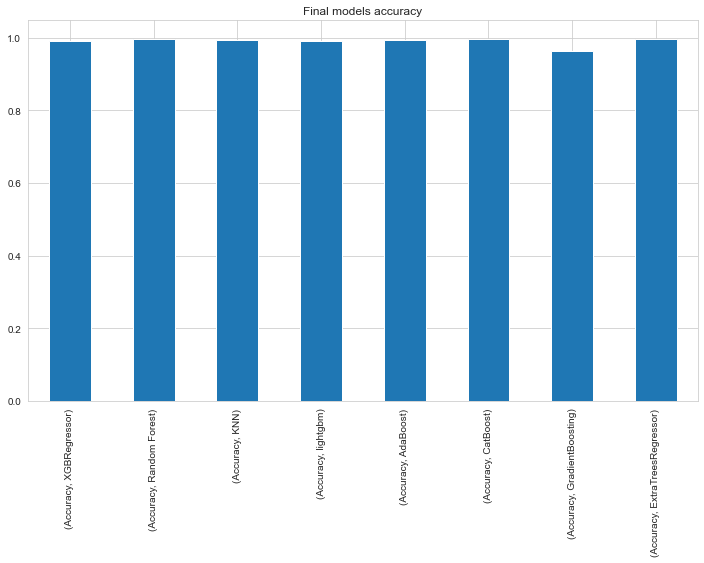

In [36]:
allacc.unstack().plot(kind = 'bar', stacked = True, figsize = (12, 7), title = 'Final models accuracy')

# Explainable AI

# Lime

In [24]:
import lime
import lime.lime_tabular

In [41]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=features, class_names=target,mode='regression')


In [45]:
exp = explainer.explain_instance(X_test.iloc[8],model6.predict,num_features=10,top_labels=1)

In [46]:
exp

In [47]:
exp.show_in_notebook(show_table=True, show_all=False)

In [49]:
#verify our sample
X_test.iloc[8]

year                  2021
month                   11
duoarea                 16
area-name               21
product                  0
product-name             0
process                  1
process-name             7
series                 278
series-description      58
units                    0
Name: 2021-11-01 00:00:00, dtype: int64

In [50]:
exp = explainer.explain_instance(X_test.iloc[10],model6.predict,num_features=10,top_labels=1)

In [51]:
exp.show_in_notebook(show_table=True, show_all=False)

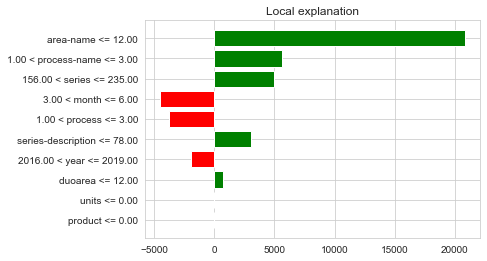

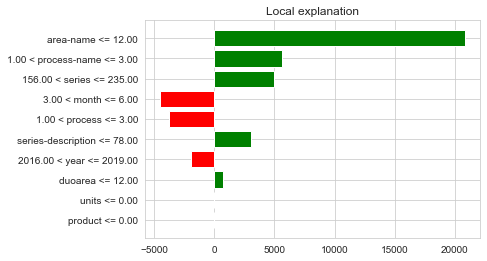

In [52]:
exp.as_pyplot_figure()

# Shap

In [54]:
import shap

In [57]:
explainer = shap.Explainer(model6, masker=X_train, feature_names=features)
shap.initjs()
shap_values = explainer(X_test)

100%|===================| 7598/7599 [413:17<00:03]         

# waterfall Plot

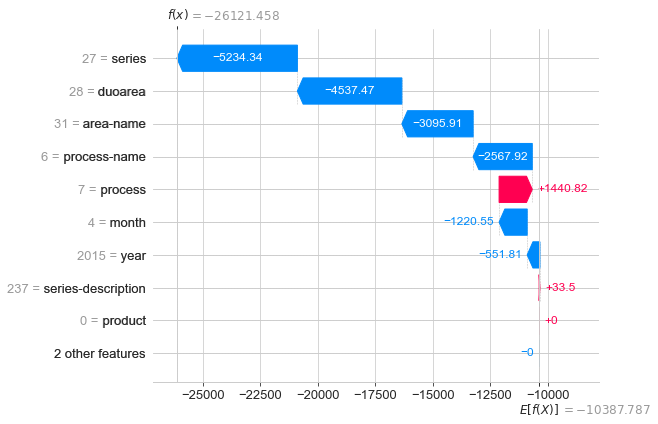

In [58]:
shap.plots.waterfall(shap_values[0])

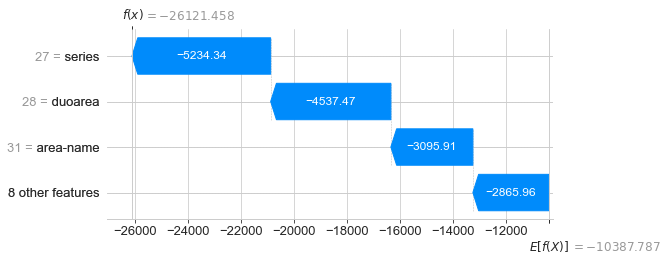

In [59]:
shap.plots.waterfall(shap_values[0], max_display=4) #Waterfall plot for first observation

# Force Plot

In [60]:
shap.plots.force(shap_values[0])

# Stacked Force Plot

In [62]:
shap.plots.force(shap_values[0:100])

# Absolute Mean Shap

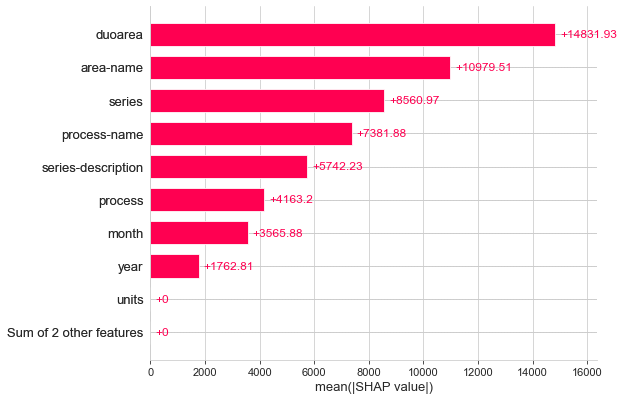

In [63]:
shap.plots.bar(shap_values)

# Beeswarm Plot

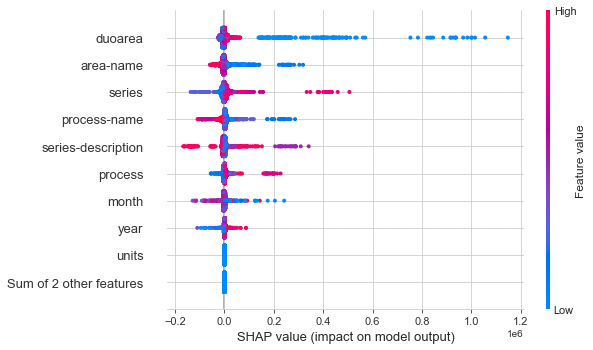

In [64]:
shap.plots.beeswarm(shap_values)

# Dependeces Plot

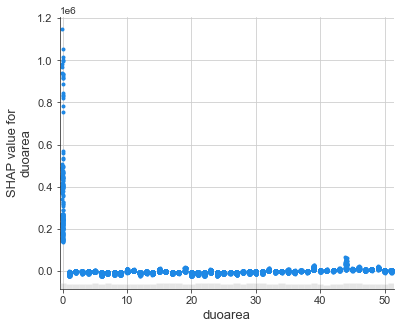

In [66]:
shap.plots.scatter(shap_values[:,'duoarea'])

In [65]:
df.columns

Index(['year', 'month', 'duoarea', 'area-name', 'product', 'product-name',
       'process', 'process-name', 'series', 'series-description', 'value',
       'units'],
      dtype='object')

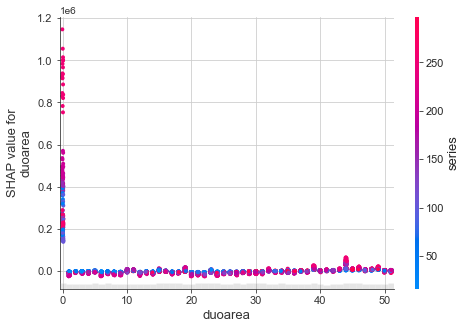

In [67]:
shap.plots.scatter(shap_values[:,'duoarea'], color=shap_values[:,"series"])

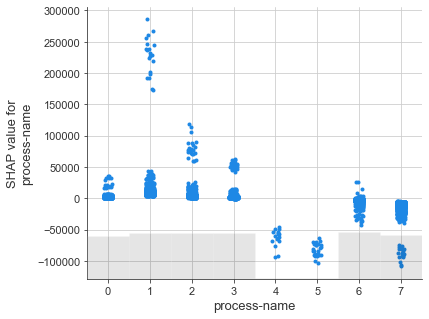

In [68]:
shap.plots.scatter(shap_values[:,'process-name'])